In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
import tensorflow as tf
from plot_keras_history import show_history, plot_history

In [3]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\NN-based_distance\\tripdf_hs_sphs.csv', index_col=0)
print(df.shape)
df.tail()

(16231, 9)


,travel time,real travel time,euc_dist,distance,hour of day,O lat,O lon,D lat,D lon
16226,1700,1712.0,0.139091,22341.337,8,49.438772,18.772652,49.300220,18.784883
16227,1337,1350.0,0.138997,21957.802,22,49.438643,18.772910,49.300166,18.784926
16228,1240,1252.0,0.139205,22461.781,1,49.438858,18.772781,49.300188,18.784969
16229,1266,1272.0,0.138397,22737.294,3,49.438043,18.772330,49.300220,18.784926
16230,1216,1227.0,0.139646,22127.191,23,49.439362,18.772759,49.300241,18.784862


In [4]:
# cyclical feature transformation hour
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))

In [5]:
# df = pd.merge(df0,df3, on = ['travel time','distance','hour of day'])
df = df.drop(['travel time','distance','O lat','O lon','D lat','D lon','hour of day'],axis=1)
df.rename(columns = {'real travel time':'travel time'}, inplace = True)
df = pd.concat([df.iloc[:,-5:].reset_index(drop=True) , df.iloc[:,0:-5].reset_index(drop=True)] , axis=1)
df.head(2)
df

,travel time,euc_dist,hr_sin,hr_cos
0,2232.0,0.120248,-1.000000,-1.836970e-16
1,828.0,0.120308,-0.707107,7.071068e-01
2,755.0,0.116818,-0.965926,2.588190e-01
3,894.0,0.120005,-0.965926,-2.588190e-01
4,882.0,0.119908,-0.965926,-2.588190e-01
...,...,...,...,...
16226,1712.0,0.139091,0.866025,-5.000000e-01
16227,1350.0,0.138997,-0.500000,8.660254e-01
16228,1252.0,0.139205,0.258819,9.659258e-01
16229,1272.0,0.138397,0.707107,7.071068e-01


In [6]:
# sns.lmplot(x='euc_dist',y='travel time',data=df, height=3, aspect=1.5)

In [7]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
# from scipy import stats
# df = df[(np.abs(stats.zscore(df['euc_dist'])) < 3)]
# df.shape

# NN-model

In [6]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))  
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [7]:
# This is the same as previous cell, but to solve the data type inconsistency
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0)) 
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [10]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [8]:
x = np.array(df[['euc_dist']])
y = np.array(df['travel time'])
# x

In [9]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12984, 1)
(3247, 1)


In [11]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=600)
model1_1

Epoch 1/600
406/406 [==============================] - 1s 917us/step - loss: 1141135.3750 - mape: 99.9701 - rmse: 1068.2394 - val_loss: 1161213.3750 - val_mape: 99.9393 - val_rmse: 1077.5961
Epoch 2/600
406/406 [==============================] - 0s 727us/step - loss: 1140364.2500 - mape: 99.9083 - rmse: 1067.8784 - val_loss: 1160461.3750 - val_mape: 99.8786 - val_rmse: 1077.2471
Epoch 3/600
406/406 [==============================] - 0s 710us/step - loss: 1139619.3750 - mape: 99.8470 - rmse: 1067.5295 - val_loss: 1159709.7500 - val_mape: 99.8179 - val_rmse: 1076.8982
Epoch 4/600
406/406 [==============================] - 0s 683us/step - loss: 1138874.8750 - mape: 99.7858 - rmse: 1067.1808 - val_loss: 1158957.6250 - val_mape: 99.7571 - val_rmse: 1076.5490
Epoch 5/600
406/406 [==============================] - 0s 747us/step - loss: 1138132.1250 - mape: 99.7241 - rmse: 1066.8328 - val_loss: 1158208.6250 - val_mape: 99.6965 - val_rmse: 1076.2010
Epoch 6/600
406/406 [========================

Epoch 44/600
406/406 [==============================] - 0s 695us/step - loss: 1109383.1250 - mape: 97.3350 - rmse: 1053.2726 - val_loss: 1129187.8750 - val_mape: 97.3288 - val_rmse: 1062.6326
Epoch 45/600
406/406 [==============================] - 0s 731us/step - loss: 1108652.3750 - mape: 97.2741 - rmse: 1052.9257 - val_loss: 1128450.5000 - val_mape: 97.2682 - val_rmse: 1062.2855
Epoch 46/600
406/406 [==============================] - 0s 722us/step - loss: 1107922.3750 - mape: 97.2125 - rmse: 1052.5789 - val_loss: 1127713.0000 - val_mape: 97.2074 - val_rmse: 1061.9384
Epoch 47/600
406/406 [==============================] - 0s 772us/step - loss: 1107192.7500 - mape: 97.1513 - rmse: 1052.2323 - val_loss: 1126977.1250 - val_mape: 97.1468 - val_rmse: 1061.5918
Epoch 48/600
406/406 [==============================] - 0s 743us/step - loss: 1106463.1250 - mape: 97.0900 - rmse: 1051.8855 - val_loss: 1126239.6250 - val_mape: 97.0861 - val_rmse: 1061.2444
Epoch 49/600
406/406 [==================

Epoch 87/600
406/406 [==============================] - 0s 732us/step - loss: 1078267.6250 - mape: 94.7012 - rmse: 1038.3966 - val_loss: 1097772.5000 - val_mape: 94.7191 - val_rmse: 1047.7463
Epoch 88/600
406/406 [==============================] - 0s 687us/step - loss: 1077552.0000 - mape: 94.6401 - rmse: 1038.0520 - val_loss: 1097050.5000 - val_mape: 94.6585 - val_rmse: 1047.4017
Epoch 89/600
406/406 [==============================] - 0s 725us/step - loss: 1076836.5000 - mape: 94.5790 - rmse: 1037.7073 - val_loss: 1096327.5000 - val_mape: 94.5978 - val_rmse: 1047.0566
Epoch 90/600
406/406 [==============================] - 0s 728us/step - loss: 1076120.3750 - mape: 94.5182 - rmse: 1037.3622 - val_loss: 1095604.2500 - val_mape: 94.5371 - val_rmse: 1046.7112
Epoch 91/600
406/406 [==============================] - 0s 708us/step - loss: 1075403.7500 - mape: 94.4567 - rmse: 1037.0167 - val_loss: 1094882.3750 - val_mape: 94.4764 - val_rmse: 1046.3662
Epoch 92/600
406/406 [==================

406/406 [==============================] - 0s 659us/step - loss: 1048460.7500 - mape: 92.1296 - rmse: 1023.9437 - val_loss: 1067674.3750 - val_mape: 92.1705 - val_rmse: 1033.2833
Epoch 130/600
406/406 [==============================] - 0s 735us/step - loss: 1047758.8125 - mape: 92.0681 - rmse: 1023.6009 - val_loss: 1066965.2500 - val_mape: 92.1098 - val_rmse: 1032.9401
Epoch 131/600
406/406 [==============================] - 0s 655us/step - loss: 1047056.5000 - mape: 92.0071 - rmse: 1023.2578 - val_loss: 1066256.1250 - val_mape: 92.0492 - val_rmse: 1032.5968
Epoch 132/600
406/406 [==============================] - 0s 657us/step - loss: 1046355.1875 - mape: 91.9458 - rmse: 1022.9150 - val_loss: 1065547.2500 - val_mape: 91.9885 - val_rmse: 1032.2535
Epoch 133/600
406/406 [==============================] - 0s 686us/step - loss: 1045653.3125 - mape: 91.8847 - rmse: 1022.5719 - val_loss: 1064838.2500 - val_mape: 91.9278 - val_rmse: 1031.9100
Epoch 134/600
406/406 [==========================

406/406 [==============================] - 0s 701us/step - loss: 1019236.8750 - mape: 89.5582 - rmse: 1009.5726 - val_loss: 1038157.5000 - val_mape: 89.6225 - val_rmse: 1018.9001
Epoch 172/600
406/406 [==============================] - 0s 712us/step - loss: 1018547.1250 - mape: 89.4974 - rmse: 1009.2310 - val_loss: 1037459.7500 - val_mape: 89.5617 - val_rmse: 1018.5577
Epoch 173/600
406/406 [==============================] - 0s 711us/step - loss: 1017857.5625 - mape: 89.4356 - rmse: 1008.8893 - val_loss: 1036765.3750 - val_mape: 89.5012 - val_rmse: 1018.2167
Epoch 174/600
406/406 [==============================] - 0s 705us/step - loss: 1017170.6250 - mape: 89.3745 - rmse: 1008.5488 - val_loss: 1036070.2500 - val_mape: 89.4405 - val_rmse: 1017.8754
Epoch 175/600
406/406 [==============================] - 0s 692us/step - loss: 1016482.4375 - mape: 89.3133 - rmse: 1008.2075 - val_loss: 1035375.3750 - val_mape: 89.3798 - val_rmse: 1017.5340
Epoch 176/600
406/406 [==========================

Epoch 214/600
406/406 [==============================] - 0s 683us/step - loss: 989914.0625 - mape: 86.9262 - rmse: 994.9443 - val_loss: 1008535.9375 - val_mape: 87.0143 - val_rmse: 1004.2589
Epoch 215/600
406/406 [==============================] - 0s 712us/step - loss: 989239.6875 - mape: 86.8650 - rmse: 994.6053 - val_loss: 1007853.2500 - val_mape: 86.9536 - val_rmse: 1003.9189
Epoch 216/600
406/406 [==============================] - 0s 703us/step - loss: 988565.3125 - mape: 86.8035 - rmse: 994.2662 - val_loss: 1007172.6875 - val_mape: 86.8930 - val_rmse: 1003.5800
Epoch 217/600
406/406 [==============================] - 0s 715us/step - loss: 987891.8750 - mape: 86.7424 - rmse: 993.9275 - val_loss: 1006492.3125 - val_mape: 86.8324 - val_rmse: 1003.2409
Epoch 218/600
406/406 [==============================] - 0s 716us/step - loss: 987218.0000 - mape: 86.6813 - rmse: 993.5884 - val_loss: 1005811.7500 - val_mape: 86.7718 - val_rmse: 1002.9017
Epoch 219/600
406/406 [======================

406/406 [==============================] - 0s 710us/step - loss: 961202.9375 - mape: 84.2951 - rmse: 980.4095 - val_loss: 979525.1250 - val_mape: 84.4071 - val_rmse: 989.7096
Epoch 258/600
406/406 [==============================] - 0s 765us/step - loss: 960542.0000 - mape: 84.2338 - rmse: 980.0724 - val_loss: 978857.6875 - val_mape: 84.3464 - val_rmse: 989.3724
Epoch 259/600
406/406 [==============================] - 0s 700us/step - loss: 959882.5000 - mape: 84.1725 - rmse: 979.7360 - val_loss: 978190.4375 - val_mape: 84.2858 - val_rmse: 989.0351
Epoch 260/600
406/406 [==============================] - 0s 722us/step - loss: 959222.6250 - mape: 84.1115 - rmse: 979.3991 - val_loss: 977523.7500 - val_mape: 84.2252 - val_rmse: 988.6980
Epoch 261/600
406/406 [==============================] - 0s 685us/step - loss: 958562.8125 - mape: 84.0503 - rmse: 979.0622 - val_loss: 976857.6875 - val_mape: 84.1646 - val_rmse: 988.3611
Epoch 262/600
406/406 [==============================] - 0s 741us/ste

406/406 [==============================] - 0s 691us/step - loss: 933101.3750 - mape: 81.6650 - rmse: 965.9717 - val_loss: 951125.0625 - val_mape: 81.8007 - val_rmse: 975.2564
Epoch 301/600
406/406 [==============================] - 0s 692us/step - loss: 932454.4375 - mape: 81.6037 - rmse: 965.6368 - val_loss: 950471.3750 - val_mape: 81.7401 - val_rmse: 974.9212
Epoch 302/600
406/406 [==============================] - 0s 716us/step - loss: 931809.1875 - mape: 81.5427 - rmse: 965.3026 - val_loss: 949818.2500 - val_mape: 81.6795 - val_rmse: 974.5862
Epoch 303/600
406/406 [==============================] - 0s 740us/step - loss: 931163.6250 - mape: 81.4816 - rmse: 964.9682 - val_loss: 949166.5000 - val_mape: 81.6189 - val_rmse: 974.2518
Epoch 304/600
406/406 [==============================] - 0s 729us/step - loss: 930518.1250 - mape: 81.4202 - rmse: 964.6337 - val_loss: 948513.8750 - val_mape: 81.5583 - val_rmse: 973.9167
Epoch 305/600
406/406 [==============================] - 0s 666us/ste

406/406 [==============================] - 0s 716us/step - loss: 905608.6250 - mape: 79.0424 - rmse: 951.6347 - val_loss: 923333.7500 - val_mape: 79.1972 - val_rmse: 960.9026
Epoch 344/600
406/406 [==============================] - 0s 704us/step - loss: 904976.5625 - mape: 78.9813 - rmse: 951.3026 - val_loss: 922694.5625 - val_mape: 79.1368 - val_rmse: 960.5699
Epoch 345/600
406/406 [==============================] - 0s 692us/step - loss: 904345.5000 - mape: 78.9207 - rmse: 950.9708 - val_loss: 922056.3125 - val_mape: 79.0764 - val_rmse: 960.2376
Epoch 346/600
406/406 [==============================] - 0s 716us/step - loss: 903713.1250 - mape: 78.8597 - rmse: 950.6382 - val_loss: 921417.1875 - val_mape: 79.0160 - val_rmse: 959.9048
Epoch 347/600
406/406 [==============================] - 0s 716us/step - loss: 903082.3750 - mape: 78.7989 - rmse: 950.3065 - val_loss: 920778.8125 - val_mape: 78.9555 - val_rmse: 959.5722
Epoch 348/600
406/406 [==============================] - 0s 699us/ste

406/406 [==============================] - 0s 692us/step - loss: 878723.2500 - mape: 76.4262 - rmse: 937.4024 - val_loss: 896149.0625 - val_mape: 76.6004 - val_rmse: 946.6515
Epoch 387/600
406/406 [==============================] - 0s 716us/step - loss: 878105.0625 - mape: 76.3649 - rmse: 937.0726 - val_loss: 895525.0000 - val_mape: 76.5400 - val_rmse: 946.3218
Epoch 388/600
406/406 [==============================] - 0s 691us/step - loss: 877487.8125 - mape: 76.3045 - rmse: 936.7432 - val_loss: 894899.8125 - val_mape: 76.4797 - val_rmse: 945.9915
Epoch 389/600
406/406 [==============================] - 0s 691us/step - loss: 876871.0625 - mape: 76.2436 - rmse: 936.4139 - val_loss: 894276.3750 - val_mape: 76.4193 - val_rmse: 945.6619
Epoch 390/600
406/406 [==============================] - 0s 716us/step - loss: 876254.0000 - mape: 76.1829 - rmse: 936.0844 - val_loss: 893651.8750 - val_mape: 76.3589 - val_rmse: 945.3316
Epoch 391/600
406/406 [==============================] - 0s 689us/ste

406/406 [==============================] - 0s 677us/step - loss: 852444.3750 - mape: 73.8115 - rmse: 923.2791 - val_loss: 869572.3125 - val_mape: 74.0102 - val_rmse: 932.5086
Epoch 430/600
406/406 [==============================] - 0s 703us/step - loss: 851840.9375 - mape: 73.7507 - rmse: 922.9523 - val_loss: 868961.6875 - val_mape: 73.9501 - val_rmse: 932.1812
Epoch 431/600
406/406 [==============================] - 0s 690us/step - loss: 851237.6875 - mape: 73.6903 - rmse: 922.6254 - val_loss: 868351.1250 - val_mape: 73.8900 - val_rmse: 931.8536
Epoch 432/600
406/406 [==============================] - 0s 729us/step - loss: 850634.3750 - mape: 73.6295 - rmse: 922.2984 - val_loss: 867741.0625 - val_mape: 73.8300 - val_rmse: 931.5262
Epoch 433/600
406/406 [==============================] - 0s 728us/step - loss: 850031.1875 - mape: 73.5689 - rmse: 921.9714 - val_loss: 867130.8125 - val_mape: 73.7699 - val_rmse: 931.1986
Epoch 434/600
406/406 [==============================] - 0s 713us/ste

406/406 [==============================] - 0s 679us/step - loss: 826775.4375 - mape: 71.2136 - rmse: 909.2719 - val_loss: 843605.2500 - val_mape: 71.4302 - val_rmse: 918.4799
Epoch 473/600
406/406 [==============================] - 0s 691us/step - loss: 826186.0625 - mape: 71.1536 - rmse: 908.9478 - val_loss: 843008.3750 - val_mape: 71.3703 - val_rmse: 918.1548
Epoch 474/600
406/406 [==============================] - 0s 684us/step - loss: 825597.0625 - mape: 71.0931 - rmse: 908.6237 - val_loss: 842412.3750 - val_mape: 71.3104 - val_rmse: 917.8303
Epoch 475/600
406/406 [==============================] - 0s 662us/step - loss: 825008.8750 - mape: 71.0329 - rmse: 908.3000 - val_loss: 841817.4375 - val_mape: 71.2506 - val_rmse: 917.5061
Epoch 476/600
406/406 [==============================] - 0s 700us/step - loss: 824420.3750 - mape: 70.9730 - rmse: 907.9760 - val_loss: 841221.1250 - val_mape: 71.1907 - val_rmse: 917.1811
Epoch 477/600
406/406 [==============================] - 0s 697us/ste

406/406 [==============================] - 0s 691us/step - loss: 801715.5625 - mape: 68.6276 - rmse: 895.3857 - val_loss: 818245.3125 - val_mape: 68.8563 - val_rmse: 904.5692
Epoch 516/600
406/406 [==============================] - 0s 658us/step - loss: 801139.3125 - mape: 68.5675 - rmse: 895.0638 - val_loss: 817662.1250 - val_mape: 68.7965 - val_rmse: 904.2467
Epoch 517/600
406/406 [==============================] - 0s 660us/step - loss: 800564.3125 - mape: 68.5073 - rmse: 894.7426 - val_loss: 817080.4375 - val_mape: 68.7368 - val_rmse: 903.9250
Epoch 518/600
406/406 [==============================] - 0s 697us/step - loss: 799988.8750 - mape: 68.4478 - rmse: 894.4210 - val_loss: 816498.6875 - val_mape: 68.6771 - val_rmse: 903.6031
Epoch 519/600
406/406 [==============================] - 0s 719us/step - loss: 799414.4375 - mape: 68.3874 - rmse: 894.0998 - val_loss: 815917.5000 - val_mape: 68.6174 - val_rmse: 903.2815
Epoch 520/600
406/406 [==============================] - 0s 696us/ste

406/406 [==============================] - 0s 697us/step - loss: 777262.0625 - mape: 66.0545 - rmse: 881.6247 - val_loss: 793494.0625 - val_mape: 66.2977 - val_rmse: 890.7828
Epoch 559/600
406/406 [==============================] - 0s 674us/step - loss: 776700.1875 - mape: 65.9950 - rmse: 881.3060 - val_loss: 792925.4375 - val_mape: 66.2385 - val_rmse: 890.4636
Epoch 560/600
406/406 [==============================] - 0s 696us/step - loss: 776138.6875 - mape: 65.9353 - rmse: 880.9874 - val_loss: 792356.5625 - val_mape: 66.1793 - val_rmse: 890.1441
Epoch 561/600
406/406 [==============================] - 0s 672us/step - loss: 775577.8125 - mape: 65.8758 - rmse: 880.6689 - val_loss: 791789.0000 - val_mape: 66.1201 - val_rmse: 889.8253
Epoch 562/600
406/406 [==============================] - 0s 698us/step - loss: 775017.0625 - mape: 65.8160 - rmse: 880.3505 - val_loss: 791221.3125 - val_mape: 66.0609 - val_rmse: 889.5062
Epoch 563/600
406/406 [==============================] - 0s 705us/ste

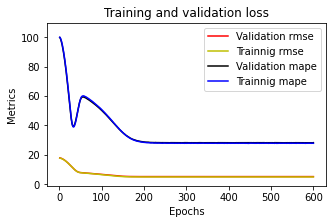

In [15]:
plotme(model1_1)

In [12]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=600)
model1_2

Epoch 1/600
406/406 [==============================] - 0s 811us/step - loss: 1140413.2500 - mape: 99.9195 - rmse: 1067.9014 - val_loss: 1159239.8750 - val_mape: 99.7979 - val_rmse: 1076.6801
Epoch 2/600
406/406 [==============================] - 0s 741us/step - loss: 1136079.2500 - mape: 99.5900 - rmse: 1065.8702 - val_loss: 1153267.8750 - val_mape: 99.3496 - val_rmse: 1073.9031
Epoch 3/600
406/406 [==============================] - 0s 658us/step - loss: 1128656.7500 - mape: 99.0240 - rmse: 1062.3826 - val_loss: 1144354.6250 - val_mape: 98.6765 - val_rmse: 1069.7451
Epoch 4/600
406/406 [==============================] - 0s 659us/step - loss: 1118534.2500 - mape: 98.2448 - rmse: 1057.6078 - val_loss: 1132949.1250 - val_mape: 97.8095 - val_rmse: 1064.4009
Epoch 5/600
406/406 [==============================] - 0s 662us/step - loss: 1106080.3750 - mape: 97.2788 - rmse: 1051.7036 - val_loss: 1119323.5000 - val_mape: 96.7659 - val_rmse: 1057.9808
Epoch 6/600
406/406 [========================

406/406 [==============================] - 0s 657us/step - loss: 251590.1094 - mape: 50.2537 - rmse: 501.5876 - val_loss: 255808.5469 - val_mape: 50.6037 - val_rmse: 505.7752
Epoch 45/600
406/406 [==============================] - 0s 657us/step - loss: 244362.3125 - mape: 51.8043 - rmse: 494.3302 - val_loss: 248827.9375 - val_mape: 52.0575 - val_rmse: 498.8266
Epoch 46/600
406/406 [==============================] - 0s 668us/step - loss: 238389.7500 - mape: 53.2339 - rmse: 488.2517 - val_loss: 243145.7188 - val_mape: 53.4281 - val_rmse: 493.0981
Epoch 47/600
406/406 [==============================] - 0s 693us/step - loss: 233586.0000 - mape: 54.6426 - rmse: 483.3073 - val_loss: 238530.9375 - val_mape: 54.7191 - val_rmse: 488.3963
Epoch 48/600
406/406 [==============================] - 0s 702us/step - loss: 229831.7656 - mape: 55.9586 - rmse: 479.4077 - val_loss: 234928.3750 - val_mape: 55.8784 - val_rmse: 484.6941
Epoch 49/600
406/406 [==============================] - 0s 659us/step - l

Epoch 88/600
406/406 [==============================] - 0s 660us/step - loss: 174589.3125 - mape: 54.1455 - rmse: 417.8389 - val_loss: 180514.7500 - val_mape: 53.4777 - val_rmse: 424.8703
Epoch 89/600
406/406 [==============================] - 0s 657us/step - loss: 173205.6875 - mape: 53.8690 - rmse: 416.1799 - val_loss: 179161.1875 - val_mape: 53.2435 - val_rmse: 423.2744
Epoch 90/600
406/406 [==============================] - 0s 669us/step - loss: 171818.6094 - mape: 53.6225 - rmse: 414.5101 - val_loss: 177794.6562 - val_mape: 53.0434 - val_rmse: 421.6570
Epoch 91/600
406/406 [==============================] - 0s 696us/step - loss: 170428.9844 - mape: 53.3832 - rmse: 412.8304 - val_loss: 176433.4375 - val_mape: 52.8082 - val_rmse: 420.0398
Epoch 92/600
406/406 [==============================] - 0s 680us/step - loss: 169035.0000 - mape: 53.1416 - rmse: 411.1387 - val_loss: 175068.6719 - val_mape: 52.5563 - val_rmse: 418.4121
Epoch 93/600
406/406 [==============================] - 0s 6

406/406 [==============================] - 0s 694us/step - loss: 116797.1797 - mape: 41.3645 - rmse: 341.7560 - val_loss: 124267.2656 - val_mape: 41.0881 - val_rmse: 352.5156
Epoch 132/600
406/406 [==============================] - 0s 697us/step - loss: 115683.1172 - mape: 41.0126 - rmse: 340.1222 - val_loss: 123187.6875 - val_mape: 40.7843 - val_rmse: 350.9810
Epoch 133/600
406/406 [==============================] - 0s 695us/step - loss: 114592.7656 - mape: 40.6789 - rmse: 338.5155 - val_loss: 122140.2578 - val_mape: 40.4647 - val_rmse: 349.4857
Epoch 134/600
406/406 [==============================] - 0s 739us/step - loss: 113523.6484 - mape: 40.3402 - rmse: 336.9327 - val_loss: 121096.8438 - val_mape: 40.1825 - val_rmse: 347.9897
Epoch 135/600
406/406 [==============================] - 0s 679us/step - loss: 112475.6562 - mape: 39.9921 - rmse: 335.3739 - val_loss: 120092.8281 - val_mape: 39.8608 - val_rmse: 346.5441
Epoch 136/600
406/406 [==============================] - 0s 698us/ste

406/406 [==============================] - 0s 696us/step - loss: 91884.6406 - mape: 30.4568 - rmse: 303.1248 - val_loss: 100578.0234 - val_mape: 30.6785 - val_rmse: 317.1404
Epoch 175/600
406/406 [==============================] - 0s 658us/step - loss: 91766.7812 - mape: 30.3986 - rmse: 302.9303 - val_loss: 100481.1562 - val_mape: 30.5248 - val_rmse: 316.9876
Epoch 176/600
406/406 [==============================] - 0s 679us/step - loss: 91658.5312 - mape: 30.2142 - rmse: 302.7516 - val_loss: 100384.6094 - val_mape: 30.4027 - val_rmse: 316.8353
Epoch 177/600
406/406 [==============================] - 0s 697us/step - loss: 91559.9453 - mape: 30.1531 - rmse: 302.5887 - val_loss: 100284.6953 - val_mape: 30.3173 - val_rmse: 316.6776
Epoch 178/600
406/406 [==============================] - 0s 658us/step - loss: 91470.0391 - mape: 29.9273 - rmse: 302.4402 - val_loss: 100198.9062 - val_mape: 30.2276 - val_rmse: 316.5421
Epoch 179/600
406/406 [==============================] - 0s 734us/step - l

Epoch 218/600
406/406 [==============================] - 0s 700us/step - loss: 90650.1016 - mape: 28.1757 - rmse: 301.0815 - val_loss: 99497.9609 - val_mape: 28.4937 - val_rmse: 315.4330
Epoch 219/600
406/406 [==============================] - 0s 659us/step - loss: 90650.9453 - mape: 28.1622 - rmse: 301.0829 - val_loss: 99519.2031 - val_mape: 28.4356 - val_rmse: 315.4666
Epoch 220/600
406/406 [==============================] - 0s 658us/step - loss: 90648.8906 - mape: 28.1243 - rmse: 301.0795 - val_loss: 99515.2188 - val_mape: 28.4323 - val_rmse: 315.4603
Epoch 221/600
406/406 [==============================] - 0s 697us/step - loss: 90649.0859 - mape: 28.1221 - rmse: 301.0799 - val_loss: 99494.4219 - val_mape: 28.4650 - val_rmse: 315.4274
Epoch 222/600
406/406 [==============================] - 0s 658us/step - loss: 90646.5938 - mape: 28.0551 - rmse: 301.0757 - val_loss: 99487.3516 - val_mape: 28.4732 - val_rmse: 315.4162
Epoch 223/600
406/406 [==============================] - 0s 697us

Epoch 262/600
406/406 [==============================] - 0s 663us/step - loss: 90638.4062 - mape: 27.9503 - rmse: 301.0621 - val_loss: 99494.4688 - val_mape: 28.2905 - val_rmse: 315.4274
Epoch 263/600
406/406 [==============================] - 0s 663us/step - loss: 90638.3203 - mape: 27.9598 - rmse: 301.0620 - val_loss: 99492.6641 - val_mape: 28.2920 - val_rmse: 315.4246
Epoch 264/600
406/406 [==============================] - 0s 659us/step - loss: 90638.6094 - mape: 27.9193 - rmse: 301.0625 - val_loss: 99483.9531 - val_mape: 28.3104 - val_rmse: 315.4108
Epoch 265/600
406/406 [==============================] - 0s 697us/step - loss: 90638.1406 - mape: 27.9168 - rmse: 301.0617 - val_loss: 99475.6875 - val_mape: 28.3294 - val_rmse: 315.3977
Epoch 266/600
406/406 [==============================] - 0s 666us/step - loss: 90638.2656 - mape: 27.9843 - rmse: 301.0619 - val_loss: 99507.6094 - val_mape: 28.2577 - val_rmse: 315.4483
Epoch 267/600
406/406 [==============================] - 0s 662us

Epoch 306/600
406/406 [==============================] - 0s 630us/step - loss: 90639.2031 - mape: 27.8835 - rmse: 301.0634 - val_loss: 99502.8906 - val_mape: 28.2548 - val_rmse: 315.4408
Epoch 307/600
406/406 [==============================] - 0s 661us/step - loss: 90637.8984 - mape: 27.9061 - rmse: 301.0613 - val_loss: 99482.8594 - val_mape: 28.3011 - val_rmse: 315.4090
Epoch 308/600
406/406 [==============================] - 0s 660us/step - loss: 90638.9688 - mape: 27.9268 - rmse: 301.0630 - val_loss: 99491.7969 - val_mape: 28.2793 - val_rmse: 315.4232
Epoch 309/600
406/406 [==============================] - 0s 659us/step - loss: 90637.4141 - mape: 27.9641 - rmse: 301.0605 - val_loss: 99498.7109 - val_mape: 28.2637 - val_rmse: 315.4342
Epoch 310/600
406/406 [==============================] - 0s 702us/step - loss: 90638.2578 - mape: 27.9295 - rmse: 301.0619 - val_loss: 99508.2109 - val_mape: 28.2426 - val_rmse: 315.4492
Epoch 311/600
406/406 [==============================] - 0s 699us

Epoch 350/600
406/406 [==============================] - 0s 683us/step - loss: 90639.0938 - mape: 27.9173 - rmse: 301.0633 - val_loss: 99497.6719 - val_mape: 28.2639 - val_rmse: 315.4325
Epoch 351/600
406/406 [==============================] - 0s 660us/step - loss: 90637.8984 - mape: 27.9936 - rmse: 301.0613 - val_loss: 99510.1172 - val_mape: 28.2363 - val_rmse: 315.4522
Epoch 352/600
406/406 [==============================] - 0s 697us/step - loss: 90639.2031 - mape: 27.8139 - rmse: 301.0634 - val_loss: 99506.1641 - val_mape: 28.2427 - val_rmse: 315.4460
Epoch 353/600
406/406 [==============================] - 0s 657us/step - loss: 90638.8203 - mape: 27.9366 - rmse: 301.0628 - val_loss: 99489.5547 - val_mape: 28.2829 - val_rmse: 315.4196
Epoch 354/600
406/406 [==============================] - 0s 698us/step - loss: 90638.6797 - mape: 27.9109 - rmse: 301.0626 - val_loss: 99491.0469 - val_mape: 28.2783 - val_rmse: 315.4220
Epoch 355/600
406/406 [==============================] - 0s 703us

Epoch 394/600
406/406 [==============================] - 0s 668us/step - loss: 90637.4766 - mape: 27.9128 - rmse: 301.0606 - val_loss: 99495.3906 - val_mape: 28.2678 - val_rmse: 315.4289
Epoch 395/600
406/406 [==============================] - 0s 697us/step - loss: 90637.5156 - mape: 27.8688 - rmse: 301.0606 - val_loss: 99481.0547 - val_mape: 28.3015 - val_rmse: 315.4062
Epoch 396/600
406/406 [==============================] - 0s 657us/step - loss: 90639.2734 - mape: 27.9666 - rmse: 301.0636 - val_loss: 99494.8125 - val_mape: 28.2685 - val_rmse: 315.4280
Epoch 397/600
406/406 [==============================] - 0s 701us/step - loss: 90638.0547 - mape: 27.8940 - rmse: 301.0616 - val_loss: 99493.6562 - val_mape: 28.2731 - val_rmse: 315.4261
Epoch 398/600
406/406 [==============================] - 0s 694us/step - loss: 90638.5000 - mape: 27.9645 - rmse: 301.0623 - val_loss: 99482.2031 - val_mape: 28.2982 - val_rmse: 315.4080
Epoch 399/600
406/406 [==============================] - 0s 659us

Epoch 438/600
406/406 [==============================] - 0s 705us/step - loss: 90639.9141 - mape: 27.9016 - rmse: 301.0646 - val_loss: 99507.9375 - val_mape: 28.2423 - val_rmse: 315.4488
Epoch 439/600
406/406 [==============================] - 0s 657us/step - loss: 90636.8828 - mape: 27.9412 - rmse: 301.0596 - val_loss: 99512.9141 - val_mape: 28.2292 - val_rmse: 315.4567
Epoch 440/600
406/406 [==============================] - 0s 657us/step - loss: 90638.1172 - mape: 27.8446 - rmse: 301.0616 - val_loss: 99487.2578 - val_mape: 28.2862 - val_rmse: 315.4160
Epoch 441/600
406/406 [==============================] - 0s 658us/step - loss: 90640.2344 - mape: 27.9514 - rmse: 301.0652 - val_loss: 99488.3906 - val_mape: 28.2831 - val_rmse: 315.4178
Epoch 442/600
406/406 [==============================] - 0s 774us/step - loss: 90637.3750 - mape: 27.8827 - rmse: 301.0604 - val_loss: 99481.5938 - val_mape: 28.2993 - val_rmse: 315.4070
Epoch 443/600
406/406 [==============================] - 0s 735us

Epoch 482/600
406/406 [==============================] - 0s 677us/step - loss: 90638.2656 - mape: 27.8915 - rmse: 301.0619 - val_loss: 99519.0156 - val_mape: 28.2171 - val_rmse: 315.4663
Epoch 483/600
406/406 [==============================] - 0s 699us/step - loss: 90638.3672 - mape: 27.8504 - rmse: 301.0621 - val_loss: 99499.5469 - val_mape: 28.2602 - val_rmse: 315.4355
Epoch 484/600
406/406 [==============================] - 0s 660us/step - loss: 90638.5312 - mape: 27.9271 - rmse: 301.0623 - val_loss: 99488.0000 - val_mape: 28.2872 - val_rmse: 315.4172
Epoch 485/600
406/406 [==============================] - 0s 658us/step - loss: 90639.6328 - mape: 27.9379 - rmse: 301.0642 - val_loss: 99503.5234 - val_mape: 28.2511 - val_rmse: 315.4418
Epoch 486/600
406/406 [==============================] - 0s 657us/step - loss: 90638.3359 - mape: 27.9291 - rmse: 301.0620 - val_loss: 99486.1484 - val_mape: 28.2910 - val_rmse: 315.4142
Epoch 487/600
406/406 [==============================] - 0s 702us

Epoch 526/600
406/406 [==============================] - 0s 697us/step - loss: 90640.4531 - mape: 27.8827 - rmse: 301.0655 - val_loss: 99497.9531 - val_mape: 28.2639 - val_rmse: 315.4330
Epoch 527/600
406/406 [==============================] - 0s 738us/step - loss: 90638.4688 - mape: 27.9548 - rmse: 301.0622 - val_loss: 99504.9922 - val_mape: 28.2467 - val_rmse: 315.4441
Epoch 528/600
406/406 [==============================] - 0s 685us/step - loss: 90639.3672 - mape: 27.9038 - rmse: 301.0637 - val_loss: 99496.5859 - val_mape: 28.2667 - val_rmse: 315.4308
Epoch 529/600
406/406 [==============================] - 0s 687us/step - loss: 90637.3672 - mape: 27.9389 - rmse: 301.0604 - val_loss: 99491.2109 - val_mape: 28.2774 - val_rmse: 315.4223
Epoch 530/600
406/406 [==============================] - 0s 658us/step - loss: 90639.3125 - mape: 27.8925 - rmse: 301.0636 - val_loss: 99507.2734 - val_mape: 28.2396 - val_rmse: 315.4477
Epoch 531/600
406/406 [==============================] - 0s 704us

Epoch 570/600
406/406 [==============================] - 0s 709us/step - loss: 90637.3906 - mape: 27.8920 - rmse: 301.0605 - val_loss: 99485.0234 - val_mape: 28.2927 - val_rmse: 315.4125
Epoch 571/600
406/406 [==============================] - 0s 698us/step - loss: 90637.3359 - mape: 27.8698 - rmse: 301.0604 - val_loss: 99468.2422 - val_mape: 28.3309 - val_rmse: 315.3859
Epoch 572/600
406/406 [==============================] - 0s 662us/step - loss: 90638.8203 - mape: 27.9335 - rmse: 301.0628 - val_loss: 99472.6484 - val_mape: 28.3229 - val_rmse: 315.3929
Epoch 573/600
406/406 [==============================] - 0s 735us/step - loss: 90639.6328 - mape: 27.9683 - rmse: 301.0642 - val_loss: 99475.5938 - val_mape: 28.3154 - val_rmse: 315.3975
Epoch 574/600
406/406 [==============================] - 0s 668us/step - loss: 90638.1484 - mape: 27.9817 - rmse: 301.0617 - val_loss: 99495.5391 - val_mape: 28.2701 - val_rmse: 315.4291
Epoch 575/600
406/406 [==============================] - 0s 696us

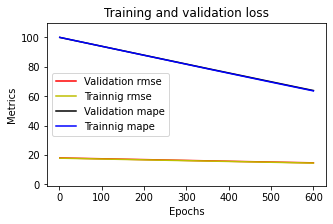

In [17]:
plotme(model1_2)

In [13]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=600)
model1_3

Epoch 1/600
406/406 [==============================] - 0s 825us/step - loss: 1139566.7500 - mape: 99.8554 - rmse: 1067.5049 - val_loss: 1157108.7500 - val_mape: 99.6385 - val_rmse: 1075.6899
Epoch 2/600
406/406 [==============================] - 0s 696us/step - loss: 1131643.2500 - mape: 99.2485 - rmse: 1063.7872 - val_loss: 1145937.5000 - val_mape: 98.7952 - val_rmse: 1070.4847
Epoch 3/600
406/406 [==============================] - 0s 698us/step - loss: 1117610.5000 - mape: 98.1621 - rmse: 1057.1710 - val_loss: 1128989.7500 - val_mape: 97.5049 - val_rmse: 1062.5393
Epoch 4/600
406/406 [==============================] - 0s 697us/step - loss: 1098310.1250 - mape: 96.6643 - rmse: 1048.0029 - val_loss: 1107176.3750 - val_mape: 95.8255 - val_rmse: 1052.2245
Epoch 5/600
406/406 [==============================] - 0s 697us/step - loss: 1074611.2500 - mape: 94.7903 - rmse: 1036.6345 - val_loss: 1081381.0000 - val_mape: 93.8117 - val_rmse: 1039.8947
Epoch 6/600
406/406 [========================

406/406 [==============================] - 0s 713us/step - loss: 208166.4219 - mape: 59.4446 - rmse: 456.2526 - val_loss: 213155.5000 - val_mape: 58.6269 - val_rmse: 461.6877
Epoch 45/600
406/406 [==============================] - 0s 700us/step - loss: 206400.5000 - mape: 59.1606 - rmse: 454.3132 - val_loss: 211418.9219 - val_mape: 58.3909 - val_rmse: 459.8031
Epoch 46/600
406/406 [==============================] - 0s 664us/step - loss: 204614.5312 - mape: 58.9676 - rmse: 452.3434 - val_loss: 209649.2500 - val_mape: 58.1788 - val_rmse: 457.8747
Epoch 47/600
406/406 [==============================] - 0s 663us/step - loss: 202814.2188 - mape: 58.6041 - rmse: 450.3490 - val_loss: 207879.5625 - val_mape: 57.9321 - val_rmse: 455.9381
Epoch 48/600
406/406 [==============================] - 0s 737us/step - loss: 201004.4062 - mape: 58.4657 - rmse: 448.3351 - val_loss: 206113.3438 - val_mape: 57.6337 - val_rmse: 453.9971
Epoch 49/600
406/406 [==============================] - 0s 696us/step - l

Epoch 88/600
406/406 [==============================] - 0s 697us/step - loss: 123951.1797 - mape: 43.2786 - rmse: 352.0670 - val_loss: 130944.0234 - val_mape: 42.9287 - val_rmse: 361.8619
Epoch 89/600
406/406 [==============================] - 0s 668us/step - loss: 122225.2344 - mape: 42.8432 - rmse: 349.6073 - val_loss: 129259.7656 - val_mape: 42.5023 - val_rmse: 359.5271
Epoch 90/600
406/406 [==============================] - 0s 690us/step - loss: 120523.6406 - mape: 42.3508 - rmse: 347.1652 - val_loss: 127630.1641 - val_mape: 42.0407 - val_rmse: 357.2536
Epoch 91/600
406/406 [==============================] - 0s 699us/step - loss: 118865.0547 - mape: 41.8041 - rmse: 344.7681 - val_loss: 126021.5156 - val_mape: 41.6706 - val_rmse: 354.9951
Epoch 92/600
406/406 [==============================] - 0s 738us/step - loss: 117266.9453 - mape: 41.4879 - rmse: 342.4426 - val_loss: 124493.4531 - val_mape: 41.2105 - val_rmse: 352.8363
Epoch 93/600
406/406 [==============================] - 0s 6

406/406 [==============================] - 0s 697us/step - loss: 91020.3906 - mape: 29.2980 - rmse: 301.6959 - val_loss: 99823.2578 - val_mape: 29.4838 - val_rmse: 315.9482
Epoch 132/600
406/406 [==============================] - 0s 702us/step - loss: 90969.1094 - mape: 29.1093 - rmse: 301.6109 - val_loss: 99730.5391 - val_mape: 29.5120 - val_rmse: 315.8014
Epoch 133/600
406/406 [==============================] - 0s 665us/step - loss: 90924.5000 - mape: 29.1979 - rmse: 301.5369 - val_loss: 99707.3750 - val_mape: 29.3846 - val_rmse: 315.7647
Epoch 134/600
406/406 [==============================] - 0s 698us/step - loss: 90886.3359 - mape: 29.0055 - rmse: 301.4736 - val_loss: 99683.1719 - val_mape: 29.2818 - val_rmse: 315.7264
Epoch 135/600
406/406 [==============================] - 0s 697us/step - loss: 90851.9141 - mape: 28.9008 - rmse: 301.4165 - val_loss: 99628.6641 - val_mape: 29.2684 - val_rmse: 315.6401
Epoch 136/600
406/406 [==============================] - 0s 703us/step - loss: 

Epoch 175/600
406/406 [==============================] - 0s 709us/step - loss: 90640.6797 - mape: 27.9259 - rmse: 301.0659 - val_loss: 99469.8359 - val_mape: 28.3678 - val_rmse: 315.3884
Epoch 176/600
406/406 [==============================] - 0s 681us/step - loss: 90639.8516 - mape: 27.9442 - rmse: 301.0645 - val_loss: 99477.1719 - val_mape: 28.3506 - val_rmse: 315.4000
Epoch 177/600
406/406 [==============================] - 0s 734us/step - loss: 90644.3203 - mape: 27.9817 - rmse: 301.0720 - val_loss: 99486.1797 - val_mape: 28.3243 - val_rmse: 315.4143
Epoch 178/600
406/406 [==============================] - 0s 707us/step - loss: 90642.1875 - mape: 27.9705 - rmse: 301.0684 - val_loss: 99486.6719 - val_mape: 28.3207 - val_rmse: 315.4151
Epoch 179/600
406/406 [==============================] - 0s 710us/step - loss: 90640.0859 - mape: 27.9564 - rmse: 301.0649 - val_loss: 99489.2188 - val_mape: 28.3120 - val_rmse: 315.4191
Epoch 180/600
406/406 [==============================] - 0s 680us

Epoch 219/600
406/406 [==============================] - 0s 662us/step - loss: 90643.7734 - mape: 27.9256 - rmse: 301.0710 - val_loss: 99494.9297 - val_mape: 28.2716 - val_rmse: 315.4282
Epoch 220/600
406/406 [==============================] - 0s 697us/step - loss: 90638.8438 - mape: 27.8937 - rmse: 301.0629 - val_loss: 99484.0078 - val_mape: 28.2953 - val_rmse: 315.4109
Epoch 221/600
406/406 [==============================] - 0s 657us/step - loss: 90641.1016 - mape: 27.9336 - rmse: 301.0666 - val_loss: 99479.9688 - val_mape: 28.3031 - val_rmse: 315.4044
Epoch 222/600
406/406 [==============================] - 0s 659us/step - loss: 90638.9062 - mape: 27.9817 - rmse: 301.0630 - val_loss: 99512.4609 - val_mape: 28.2314 - val_rmse: 315.4560
Epoch 223/600
406/406 [==============================] - 0s 699us/step - loss: 90640.7266 - mape: 27.8782 - rmse: 301.0660 - val_loss: 99494.6484 - val_mape: 28.2697 - val_rmse: 315.4277
Epoch 224/600
406/406 [==============================] - 0s 697us

Epoch 263/600
406/406 [==============================] - 0s 697us/step - loss: 90641.2500 - mape: 27.9539 - rmse: 301.0669 - val_loss: 99491.3281 - val_mape: 28.2786 - val_rmse: 315.4225
Epoch 264/600
406/406 [==============================] - 0s 738us/step - loss: 90640.5156 - mape: 27.9484 - rmse: 301.0656 - val_loss: 99513.1484 - val_mape: 28.2272 - val_rmse: 315.4571
Epoch 265/600
406/406 [==============================] - 0s 661us/step - loss: 90641.8750 - mape: 27.8985 - rmse: 301.0679 - val_loss: 99481.2578 - val_mape: 28.3009 - val_rmse: 315.4065
Epoch 266/600
406/406 [==============================] - 0s 686us/step - loss: 90643.2734 - mape: 27.9524 - rmse: 301.0702 - val_loss: 99481.0703 - val_mape: 28.2988 - val_rmse: 315.4062
Epoch 267/600
406/406 [==============================] - 0s 668us/step - loss: 90639.7500 - mape: 27.8701 - rmse: 301.0644 - val_loss: 99479.9453 - val_mape: 28.3041 - val_rmse: 315.4044
Epoch 268/600
406/406 [==============================] - 0s 658us

Epoch 307/600
406/406 [==============================] - 0s 680us/step - loss: 90639.0156 - mape: 28.0435 - rmse: 301.0631 - val_loss: 99509.7422 - val_mape: 28.2349 - val_rmse: 315.4517
Epoch 308/600
406/406 [==============================] - 0s 740us/step - loss: 90643.0000 - mape: 27.8288 - rmse: 301.0698 - val_loss: 99478.2500 - val_mape: 28.3081 - val_rmse: 315.4017
Epoch 309/600
406/406 [==============================] - 0s 743us/step - loss: 90643.4609 - mape: 27.9654 - rmse: 301.0705 - val_loss: 99512.5469 - val_mape: 28.2303 - val_rmse: 315.4561
Epoch 310/600
406/406 [==============================] - 0s 686us/step - loss: 90638.0859 - mape: 27.8516 - rmse: 301.0616 - val_loss: 99490.6797 - val_mape: 28.2804 - val_rmse: 315.4214
Epoch 311/600
406/406 [==============================] - 0s 696us/step - loss: 90638.8281 - mape: 28.0566 - rmse: 301.0628 - val_loss: 99515.7812 - val_mape: 28.2236 - val_rmse: 315.4612
Epoch 312/600
406/406 [==============================] - 0s 701us

Epoch 351/600
406/406 [==============================] - 0s 662us/step - loss: 90641.4297 - mape: 27.9264 - rmse: 301.0671 - val_loss: 99477.0312 - val_mape: 28.3124 - val_rmse: 315.3998
Epoch 352/600
406/406 [==============================] - 0s 698us/step - loss: 90639.7734 - mape: 27.9247 - rmse: 301.0644 - val_loss: 99477.9375 - val_mape: 28.3105 - val_rmse: 315.4012
Epoch 353/600
406/406 [==============================] - 0s 697us/step - loss: 90640.3906 - mape: 27.9501 - rmse: 301.0654 - val_loss: 99508.0391 - val_mape: 28.2417 - val_rmse: 315.4489
Epoch 354/600
406/406 [==============================] - 0s 660us/step - loss: 90637.9062 - mape: 28.0070 - rmse: 301.0613 - val_loss: 99525.0234 - val_mape: 28.2040 - val_rmse: 315.4759
Epoch 355/600
406/406 [==============================] - 0s 661us/step - loss: 90639.7812 - mape: 27.8886 - rmse: 301.0644 - val_loss: 99501.8047 - val_mape: 28.2532 - val_rmse: 315.4391
Epoch 356/600
406/406 [==============================] - 0s 661us

Epoch 395/600
406/406 [==============================] - 0s 696us/step - loss: 90638.8047 - mape: 28.0266 - rmse: 301.0628 - val_loss: 99528.0234 - val_mape: 28.1971 - val_rmse: 315.4806
Epoch 396/600
406/406 [==============================] - 0s 736us/step - loss: 90640.3828 - mape: 27.8477 - rmse: 301.0654 - val_loss: 99494.4922 - val_mape: 28.2718 - val_rmse: 315.4275
Epoch 397/600
406/406 [==============================] - 0s 714us/step - loss: 90640.7109 - mape: 27.9363 - rmse: 301.0659 - val_loss: 99496.8906 - val_mape: 28.2641 - val_rmse: 315.4313
Epoch 398/600
406/406 [==============================] - 0s 696us/step - loss: 90643.5156 - mape: 27.9779 - rmse: 301.0706 - val_loss: 99508.6172 - val_mape: 28.2402 - val_rmse: 315.4499
Epoch 399/600
406/406 [==============================] - 0s 742us/step - loss: 90641.9297 - mape: 27.9837 - rmse: 301.0680 - val_loss: 99570.2812 - val_mape: 28.1110 - val_rmse: 315.5476
Epoch 400/600
406/406 [==============================] - 0s 709us

Epoch 439/600
406/406 [==============================] - 0s 697us/step - loss: 90641.5312 - mape: 27.9461 - rmse: 301.0673 - val_loss: 99522.3828 - val_mape: 28.2083 - val_rmse: 315.4717
Epoch 440/600
406/406 [==============================] - 0s 658us/step - loss: 90641.0938 - mape: 27.8609 - rmse: 301.0666 - val_loss: 99482.3125 - val_mape: 28.2984 - val_rmse: 315.4082
Epoch 441/600
406/406 [==============================] - 0s 737us/step - loss: 90639.5469 - mape: 27.9966 - rmse: 301.0640 - val_loss: 99512.4766 - val_mape: 28.2301 - val_rmse: 315.4560
Epoch 442/600
406/406 [==============================] - 0s 701us/step - loss: 90639.7734 - mape: 27.8482 - rmse: 301.0644 - val_loss: 99479.1094 - val_mape: 28.3054 - val_rmse: 315.4031
Epoch 443/600
406/406 [==============================] - 0s 697us/step - loss: 90641.1406 - mape: 27.9663 - rmse: 301.0667 - val_loss: 99485.2891 - val_mape: 28.2888 - val_rmse: 315.4129
Epoch 444/600
406/406 [==============================] - 0s 698us

Epoch 483/600
406/406 [==============================] - 0s 698us/step - loss: 90641.0547 - mape: 27.8809 - rmse: 301.0665 - val_loss: 99509.3750 - val_mape: 28.2377 - val_rmse: 315.4511
Epoch 484/600
406/406 [==============================] - 0s 657us/step - loss: 90641.7188 - mape: 27.8985 - rmse: 301.0676 - val_loss: 99506.9297 - val_mape: 28.2425 - val_rmse: 315.4472
Epoch 485/600
406/406 [==============================] - 0s 697us/step - loss: 90639.0312 - mape: 27.9129 - rmse: 301.0632 - val_loss: 99493.7656 - val_mape: 28.2729 - val_rmse: 315.4263
Epoch 486/600
406/406 [==============================] - 0s 674us/step - loss: 90640.5391 - mape: 27.9042 - rmse: 301.0657 - val_loss: 99484.9844 - val_mape: 28.2939 - val_rmse: 315.4124
Epoch 487/600
406/406 [==============================] - 0s 699us/step - loss: 90639.2812 - mape: 27.9047 - rmse: 301.0636 - val_loss: 99482.2344 - val_mape: 28.2994 - val_rmse: 315.4081
Epoch 488/600
406/406 [==============================] - 0s 665us

Epoch 527/600
406/406 [==============================] - 0s 688us/step - loss: 90641.8516 - mape: 28.0144 - rmse: 301.0678 - val_loss: 99519.2734 - val_mape: 28.2161 - val_rmse: 315.4668
Epoch 528/600
406/406 [==============================] - 0s 679us/step - loss: 90633.7188 - mape: 27.7447 - rmse: 301.0544 - val_loss: 99463.9609 - val_mape: 28.3425 - val_rmse: 315.3791
Epoch 529/600
406/406 [==============================] - 0s 675us/step - loss: 90642.8750 - mape: 27.9744 - rmse: 301.0695 - val_loss: 99489.6172 - val_mape: 28.2814 - val_rmse: 315.4197
Epoch 530/600
406/406 [==============================] - 0s 737us/step - loss: 90640.2188 - mape: 27.9404 - rmse: 301.0652 - val_loss: 99493.3984 - val_mape: 28.2758 - val_rmse: 315.4258
Epoch 531/600
406/406 [==============================] - 0s 658us/step - loss: 90639.1094 - mape: 28.0124 - rmse: 301.0633 - val_loss: 99520.8203 - val_mape: 28.2106 - val_rmse: 315.4692
Epoch 532/600
406/406 [==============================] - 0s 704us

Epoch 571/600
406/406 [==============================] - 0s 658us/step - loss: 90640.4219 - mape: 27.9951 - rmse: 301.0655 - val_loss: 99511.9062 - val_mape: 28.2342 - val_rmse: 315.4551
Epoch 572/600
406/406 [==============================] - 0s 665us/step - loss: 90638.9141 - mape: 27.8758 - rmse: 301.0630 - val_loss: 99486.8203 - val_mape: 28.2910 - val_rmse: 315.4153
Epoch 573/600
406/406 [==============================] - 0s 659us/step - loss: 90640.8359 - mape: 27.9155 - rmse: 301.0662 - val_loss: 99479.0000 - val_mape: 28.3068 - val_rmse: 315.4029
Epoch 574/600
406/406 [==============================] - 0s 657us/step - loss: 90640.4609 - mape: 27.9157 - rmse: 301.0656 - val_loss: 99484.5234 - val_mape: 28.2897 - val_rmse: 315.4117
Epoch 575/600
406/406 [==============================] - 0s 697us/step - loss: 90641.0781 - mape: 27.9217 - rmse: 301.0666 - val_loss: 99491.8047 - val_mape: 28.2782 - val_rmse: 315.4232
Epoch 576/600
406/406 [==============================] - 0s 698us

In [14]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=600)
model1_4

Epoch 1/600
406/406 [==============================] - 1s 853us/step - loss: 1135569.6250 - mape: 99.5658 - rmse: 1065.6311 - val_loss: 1142640.1250 - val_mape: 98.5729 - val_rmse: 1068.9435
Epoch 2/600
406/406 [==============================] - 0s 760us/step - loss: 1083207.2500 - mape: 95.5492 - rmse: 1040.7725 - val_loss: 1047088.2500 - val_mape: 91.1805 - val_rmse: 1023.2733
Epoch 3/600
406/406 [==============================] - 0s 758us/step - loss: 938345.4375 - mape: 83.6426 - rmse: 968.6823 - val_loss: 852528.0000 - val_mape: 74.6216 - val_rmse: 923.3244
Epoch 4/600
406/406 [==============================] - 0s 796us/step - loss: 712709.4375 - mape: 62.5554 - rmse: 844.2212 - val_loss: 604179.1250 - val_mape: 50.1848 - val_rmse: 777.2896
Epoch 5/600
406/406 [==============================] - 0s 734us/step - loss: 477325.0000 - mape: 42.0431 - rmse: 690.8871 - val_loss: 390162.8750 - val_mape: 39.3696 - val_rmse: 624.6302
Epoch 6/600
406/406 [==============================] - 0s

Epoch 45/600
406/406 [==============================] - 0s 740us/step - loss: 90147.4922 - mape: 27.7779 - rmse: 300.2457 - val_loss: 98963.9297 - val_mape: 28.1681 - val_rmse: 314.5853
Epoch 46/600
406/406 [==============================] - 0s 698us/step - loss: 90152.5312 - mape: 27.7403 - rmse: 300.2541 - val_loss: 99097.4062 - val_mape: 27.8511 - val_rmse: 314.7974
Epoch 47/600
406/406 [==============================] - 0s 740us/step - loss: 90121.8281 - mape: 27.6580 - rmse: 300.2030 - val_loss: 98922.2422 - val_mape: 28.1658 - val_rmse: 314.5191
Epoch 48/600
406/406 [==============================] - 0s 751us/step - loss: 90111.2578 - mape: 27.7270 - rmse: 300.1854 - val_loss: 98988.1250 - val_mape: 27.9743 - val_rmse: 314.6238
Epoch 49/600
406/406 [==============================] - 0s 696us/step - loss: 90101.7578 - mape: 27.5994 - rmse: 300.1696 - val_loss: 98906.8047 - val_mape: 28.1260 - val_rmse: 314.4945
Epoch 50/600
406/406 [==============================] - 0s 734us/step 

406/406 [==============================] - 0s 737us/step - loss: 89367.3359 - mape: 27.4167 - rmse: 298.9437 - val_loss: 98360.4922 - val_mape: 27.4792 - val_rmse: 313.6248
Epoch 90/600
406/406 [==============================] - 0s 741us/step - loss: 89335.3672 - mape: 27.2795 - rmse: 298.8902 - val_loss: 98078.7500 - val_mape: 28.1166 - val_rmse: 313.1753
Epoch 91/600
406/406 [==============================] - 0s 734us/step - loss: 89322.0859 - mape: 27.4265 - rmse: 298.8680 - val_loss: 98325.4844 - val_mape: 27.4960 - val_rmse: 313.5689
Epoch 92/600
406/406 [==============================] - 0s 775us/step - loss: 89304.6484 - mape: 27.3486 - rmse: 298.8388 - val_loss: 98300.5781 - val_mape: 27.4942 - val_rmse: 313.5292
Epoch 93/600
406/406 [==============================] - 0s 742us/step - loss: 89287.1016 - mape: 27.3839 - rmse: 298.8095 - val_loss: 98219.0312 - val_mape: 27.5853 - val_rmse: 313.3992
Epoch 94/600
406/406 [==============================] - 0s 737us/step - loss: 89248

Epoch 133/600
406/406 [==============================] - 0s 701us/step - loss: 88460.3828 - mape: 27.0889 - rmse: 297.4229 - val_loss: 97376.2188 - val_mape: 27.3255 - val_rmse: 312.0516
Epoch 134/600
406/406 [==============================] - 0s 674us/step - loss: 88408.4844 - mape: 26.9766 - rmse: 297.3356 - val_loss: 97262.9297 - val_mape: 27.5182 - val_rmse: 311.8701
Epoch 135/600
406/406 [==============================] - 0s 735us/step - loss: 88376.2344 - mape: 27.1187 - rmse: 297.2814 - val_loss: 97357.7344 - val_mape: 27.2955 - val_rmse: 312.0220
Epoch 136/600
406/406 [==============================] - 0s 696us/step - loss: 88365.0156 - mape: 27.0579 - rmse: 297.2625 - val_loss: 97241.5156 - val_mape: 27.5036 - val_rmse: 311.8357
Epoch 137/600
406/406 [==============================] - 0s 743us/step - loss: 88346.7188 - mape: 27.1141 - rmse: 297.2318 - val_loss: 97383.8047 - val_mape: 27.1102 - val_rmse: 312.0638
Epoch 138/600
406/406 [==============================] - 0s 736us

Epoch 177/600
406/406 [==============================] - 0s 697us/step - loss: 87496.1406 - mape: 26.7114 - rmse: 295.7975 - val_loss: 96357.9453 - val_mape: 27.3129 - val_rmse: 310.4158
Epoch 178/600
406/406 [==============================] - 0s 697us/step - loss: 87466.7188 - mape: 26.7137 - rmse: 295.7477 - val_loss: 96414.3750 - val_mape: 27.0596 - val_rmse: 310.5067
Epoch 179/600
406/406 [==============================] - 0s 703us/step - loss: 87445.4688 - mape: 26.7371 - rmse: 295.7118 - val_loss: 96372.2109 - val_mape: 27.0571 - val_rmse: 310.4388
Epoch 180/600
406/406 [==============================] - 0s 698us/step - loss: 87429.7891 - mape: 26.6948 - rmse: 295.6853 - val_loss: 96350.8281 - val_mape: 27.0665 - val_rmse: 310.4043
Epoch 181/600
406/406 [==============================] - 0s 706us/step - loss: 87414.3906 - mape: 26.6948 - rmse: 295.6592 - val_loss: 96481.2031 - val_mape: 26.7764 - val_rmse: 310.6142
Epoch 182/600
406/406 [==============================] - 0s 765us

Epoch 221/600
406/406 [==============================] - 0s 708us/step - loss: 86701.1016 - mape: 26.4957 - rmse: 294.4505 - val_loss: 95743.1406 - val_mape: 26.5259 - val_rmse: 309.4239
Epoch 222/600
406/406 [==============================] - 0s 697us/step - loss: 86655.8047 - mape: 26.3526 - rmse: 294.3736 - val_loss: 95741.7734 - val_mape: 26.5070 - val_rmse: 309.4217
Epoch 223/600
406/406 [==============================] - 0s 697us/step - loss: 86632.8516 - mape: 26.2811 - rmse: 294.3346 - val_loss: 95449.1875 - val_mape: 27.1790 - val_rmse: 308.9485
Epoch 224/600
406/406 [==============================] - 0s 740us/step - loss: 86634.7734 - mape: 26.5058 - rmse: 294.3379 - val_loss: 95527.3594 - val_mape: 26.8636 - val_rmse: 309.0750
Epoch 225/600
406/406 [==============================] - 0s 645us/step - loss: 86616.1406 - mape: 26.4381 - rmse: 294.3062 - val_loss: 95721.4844 - val_mape: 26.4411 - val_rmse: 309.3889
Epoch 226/600
406/406 [==============================] - 0s 736us

Epoch 265/600
406/406 [==============================] - 0s 739us/step - loss: 86167.6406 - mape: 26.1840 - rmse: 293.5432 - val_loss: 95163.7500 - val_mape: 26.4473 - val_rmse: 308.4862
Epoch 266/600
406/406 [==============================] - 0s 736us/step - loss: 86169.4766 - mape: 26.1126 - rmse: 293.5464 - val_loss: 95080.8906 - val_mape: 26.6249 - val_rmse: 308.3519
Epoch 267/600
406/406 [==============================] - 0s 729us/step - loss: 86149.0391 - mape: 26.1644 - rmse: 293.5116 - val_loss: 95042.2891 - val_mape: 26.6954 - val_rmse: 308.2893
Epoch 268/600
406/406 [==============================] - 0s 736us/step - loss: 86137.9453 - mape: 26.1239 - rmse: 293.4927 - val_loss: 94981.9453 - val_mape: 26.8681 - val_rmse: 308.1914
Epoch 269/600
406/406 [==============================] - 0s 684us/step - loss: 86137.3359 - mape: 26.1773 - rmse: 293.4916 - val_loss: 95018.4453 - val_mape: 26.7085 - val_rmse: 308.2506
Epoch 270/600
406/406 [==============================] - 0s 753us

Epoch 309/600
406/406 [==============================] - 0s 710us/step - loss: 85932.7344 - mape: 25.9532 - rmse: 293.1429 - val_loss: 94753.6094 - val_mape: 26.8778 - val_rmse: 307.8207
Epoch 310/600
406/406 [==============================] - 0s 695us/step - loss: 85904.1797 - mape: 26.1444 - rmse: 293.0941 - val_loss: 95050.4453 - val_mape: 26.1099 - val_rmse: 308.3025
Epoch 311/600
406/406 [==============================] - 0s 721us/step - loss: 85916.0938 - mape: 26.0136 - rmse: 293.1145 - val_loss: 94943.3359 - val_mape: 26.2987 - val_rmse: 308.1288
Epoch 312/600
406/406 [==============================] - 0s 703us/step - loss: 85891.8828 - mape: 25.9924 - rmse: 293.0732 - val_loss: 94809.3203 - val_mape: 26.5792 - val_rmse: 307.9112
Epoch 313/600
406/406 [==============================] - 0s 727us/step - loss: 85909.8359 - mape: 26.0578 - rmse: 293.1038 - val_loss: 94896.8828 - val_mape: 26.3728 - val_rmse: 308.0534
Epoch 314/600
406/406 [==============================] - 0s 714us

Epoch 353/600
406/406 [==============================] - 0s 697us/step - loss: 85841.9219 - mape: 25.9619 - rmse: 292.9879 - val_loss: 94767.8047 - val_mape: 26.4349 - val_rmse: 307.8438
Epoch 354/600
406/406 [==============================] - 0s 720us/step - loss: 85842.5859 - mape: 25.9740 - rmse: 292.9890 - val_loss: 94735.5234 - val_mape: 26.5082 - val_rmse: 307.7914
Epoch 355/600
406/406 [==============================] - 0s 726us/step - loss: 85825.5703 - mape: 26.0650 - rmse: 292.9600 - val_loss: 94869.4609 - val_mape: 26.1982 - val_rmse: 308.0089
Epoch 356/600
406/406 [==============================] - 0s 689us/step - loss: 85832.8203 - mape: 25.8871 - rmse: 292.9724 - val_loss: 94726.5938 - val_mape: 26.5391 - val_rmse: 307.7769
Epoch 357/600
406/406 [==============================] - 0s 698us/step - loss: 85831.5234 - mape: 25.9874 - rmse: 292.9702 - val_loss: 94741.5156 - val_mape: 26.4676 - val_rmse: 307.8011
Epoch 358/600
406/406 [==============================] - 0s 700us

Epoch 397/600
406/406 [==============================] - 0s 740us/step - loss: 85818.9453 - mape: 25.8636 - rmse: 292.9487 - val_loss: 94652.7188 - val_mape: 26.6580 - val_rmse: 307.6568
Epoch 398/600
406/406 [==============================] - 0s 741us/step - loss: 85815.4688 - mape: 25.9842 - rmse: 292.9428 - val_loss: 94760.5703 - val_mape: 26.3612 - val_rmse: 307.8321
Epoch 399/600
406/406 [==============================] - 0s 795us/step - loss: 85802.6562 - mape: 25.9628 - rmse: 292.9209 - val_loss: 94838.0547 - val_mape: 26.2001 - val_rmse: 307.9579
Epoch 400/600
406/406 [==============================] - 0s 793us/step - loss: 85817.4609 - mape: 25.9413 - rmse: 292.9462 - val_loss: 94855.4531 - val_mape: 26.1338 - val_rmse: 307.9861
Epoch 401/600
406/406 [==============================] - 0s 753us/step - loss: 85815.7578 - mape: 25.9197 - rmse: 292.9433 - val_loss: 94690.7891 - val_mape: 26.5249 - val_rmse: 307.7187
Epoch 402/600
406/406 [==============================] - 0s 767us

Epoch 441/600
406/406 [==============================] - 0s 737us/step - loss: 85814.2266 - mape: 25.8671 - rmse: 292.9406 - val_loss: 94830.4609 - val_mape: 26.1919 - val_rmse: 307.9456
Epoch 442/600
406/406 [==============================] - 0s 740us/step - loss: 85810.5859 - mape: 25.8966 - rmse: 292.9344 - val_loss: 94744.4688 - val_mape: 26.3933 - val_rmse: 307.8059
Epoch 443/600
406/406 [==============================] - 0s 766us/step - loss: 85800.6719 - mape: 25.9454 - rmse: 292.9175 - val_loss: 94818.5625 - val_mape: 26.1912 - val_rmse: 307.9262
Epoch 444/600
406/406 [==============================] - 0s 772us/step - loss: 85808.8203 - mape: 25.9465 - rmse: 292.9314 - val_loss: 94837.5312 - val_mape: 26.1527 - val_rmse: 307.9570
Epoch 445/600
406/406 [==============================] - 0s 729us/step - loss: 85802.3203 - mape: 25.9346 - rmse: 292.9203 - val_loss: 94867.1172 - val_mape: 26.1099 - val_rmse: 308.0051
Epoch 446/600
406/406 [==============================] - 0s 741us

Epoch 485/600
406/406 [==============================] - 0s 709us/step - loss: 85770.8047 - mape: 25.7894 - rmse: 292.8665 - val_loss: 94570.1250 - val_mape: 27.0746 - val_rmse: 307.5226
Epoch 486/600
406/406 [==============================] - 0s 712us/step - loss: 85814.7656 - mape: 25.9537 - rmse: 292.9416 - val_loss: 94706.9219 - val_mape: 26.4346 - val_rmse: 307.7449
Epoch 487/600
406/406 [==============================] - 0s 731us/step - loss: 85802.1641 - mape: 25.9327 - rmse: 292.9201 - val_loss: 94810.0156 - val_mape: 26.1832 - val_rmse: 307.9124
Epoch 488/600
406/406 [==============================] - 0s 717us/step - loss: 85798.1875 - mape: 25.9558 - rmse: 292.9133 - val_loss: 94850.1875 - val_mape: 26.1197 - val_rmse: 307.9776
Epoch 489/600
406/406 [==============================] - 0s 743us/step - loss: 85811.5312 - mape: 25.9164 - rmse: 292.9361 - val_loss: 94791.6094 - val_mape: 26.2341 - val_rmse: 307.8824
Epoch 490/600
406/406 [==============================] - 0s 740us

Epoch 529/600
406/406 [==============================] - 0s 741us/step - loss: 85797.5234 - mape: 25.9779 - rmse: 292.9121 - val_loss: 94671.6328 - val_mape: 26.5676 - val_rmse: 307.6876
Epoch 530/600
406/406 [==============================] - 0s 740us/step - loss: 85802.5312 - mape: 25.8768 - rmse: 292.9207 - val_loss: 94626.7188 - val_mape: 26.7578 - val_rmse: 307.6146
Epoch 531/600
406/406 [==============================] - 0s 731us/step - loss: 85807.7344 - mape: 25.9618 - rmse: 292.9296 - val_loss: 94642.7422 - val_mape: 26.6670 - val_rmse: 307.6406
Epoch 532/600
406/406 [==============================] - 0s 726us/step - loss: 85817.0469 - mape: 25.8924 - rmse: 292.9455 - val_loss: 94676.9219 - val_mape: 26.5905 - val_rmse: 307.6962
Epoch 533/600
406/406 [==============================] - 0s 773us/step - loss: 85803.9609 - mape: 25.9763 - rmse: 292.9231 - val_loss: 94830.8125 - val_mape: 26.1497 - val_rmse: 307.9461
Epoch 534/600
406/406 [==============================] - 0s 755us

Epoch 573/600
406/406 [==============================] - 0s 718us/step - loss: 85814.2891 - mape: 25.8704 - rmse: 292.9408 - val_loss: 94742.6094 - val_mape: 26.3585 - val_rmse: 307.8029
Epoch 574/600
406/406 [==============================] - 0s 744us/step - loss: 85811.2031 - mape: 25.8957 - rmse: 292.9355 - val_loss: 94667.8750 - val_mape: 26.5322 - val_rmse: 307.6815
Epoch 575/600
406/406 [==============================] - 0s 710us/step - loss: 85784.6250 - mape: 25.8744 - rmse: 292.8901 - val_loss: 94617.3672 - val_mape: 26.7087 - val_rmse: 307.5994
Epoch 576/600
406/406 [==============================] - 0s 717us/step - loss: 85786.1172 - mape: 25.9538 - rmse: 292.8927 - val_loss: 94738.9141 - val_mape: 26.4031 - val_rmse: 307.7969
Epoch 577/600
406/406 [==============================] - 0s 775us/step - loss: 85813.5703 - mape: 25.8807 - rmse: 292.9395 - val_loss: 94800.2188 - val_mape: 26.2170 - val_rmse: 307.8965
Epoch 578/600
406/406 [==============================] - 0s 788us

In [15]:
# plotme(model1_4)

In [16]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=600)
model1_5

Epoch 1/600
406/406 [==============================] - 1s 863us/step - loss: 1123415.8750 - mape: 98.6539 - rmse: 1059.9131 - val_loss: 1096737.8750 - val_mape: 95.1078 - val_rmse: 1047.2526
Epoch 2/600
406/406 [==============================] - 0s 729us/step - loss: 943274.5625 - mape: 83.7058 - rmse: 971.2232 - val_loss: 782156.8750 - val_mape: 68.1599 - val_rmse: 884.3964
Epoch 3/600
406/406 [==============================] - 0s 727us/step - loss: 556984.8750 - mape: 48.6974 - rmse: 746.3142 - val_loss: 383777.4688 - val_mape: 39.3571 - val_rmse: 619.4977
Epoch 4/600
406/406 [==============================] - 0s 740us/step - loss: 277890.7500 - mape: 45.8558 - rmse: 527.1534 - val_loss: 233715.0469 - val_mape: 53.5019 - val_rmse: 483.4408
Epoch 5/600
406/406 [==============================] - 0s 741us/step - loss: 216371.2812 - mape: 57.7010 - rmse: 465.1573 - val_loss: 216138.0000 - val_mape: 58.6741 - val_rmse: 464.9064
Epoch 6/600
406/406 [==============================] - 0s 741

Epoch 45/600
406/406 [==============================] - 0s 715us/step - loss: 90675.2031 - mape: 27.9437 - rmse: 301.1232 - val_loss: 99650.3125 - val_mape: 28.0354 - val_rmse: 315.6744
Epoch 46/600
406/406 [==============================] - 0s 723us/step - loss: 90679.7266 - mape: 27.8235 - rmse: 301.1307 - val_loss: 99307.0156 - val_mape: 28.8353 - val_rmse: 315.1302
Epoch 47/600
406/406 [==============================] - 0s 715us/step - loss: 90689.6484 - mape: 28.0726 - rmse: 301.1472 - val_loss: 99354.5078 - val_mape: 28.6338 - val_rmse: 315.2055
Epoch 48/600
406/406 [==============================] - 0s 716us/step - loss: 90672.0469 - mape: 27.9213 - rmse: 301.1180 - val_loss: 99357.6953 - val_mape: 28.5926 - val_rmse: 315.2106
Epoch 49/600
406/406 [==============================] - 0s 731us/step - loss: 90671.3516 - mape: 27.9818 - rmse: 301.1169 - val_loss: 99617.4219 - val_mape: 28.0110 - val_rmse: 315.6223
Epoch 50/600
406/406 [==============================] - 0s 706us/step 

406/406 [==============================] - 0s 717us/step - loss: 90680.0312 - mape: 27.9144 - rmse: 301.1313 - val_loss: 99475.6641 - val_mape: 28.3304 - val_rmse: 315.3976
Epoch 90/600
406/406 [==============================] - 0s 736us/step - loss: 90688.6875 - mape: 27.9091 - rmse: 301.1456 - val_loss: 99434.6641 - val_mape: 28.4325 - val_rmse: 315.3326
Epoch 91/600
406/406 [==============================] - 0s 766us/step - loss: 90692.7500 - mape: 28.0126 - rmse: 301.1524 - val_loss: 99645.5234 - val_mape: 27.9975 - val_rmse: 315.6668
Epoch 92/600
406/406 [==============================] - 0s 740us/step - loss: 90699.2969 - mape: 27.8983 - rmse: 301.1632 - val_loss: 99402.3047 - val_mape: 28.4953 - val_rmse: 315.2813
Epoch 93/600
406/406 [==============================] - 0s 741us/step - loss: 90682.1953 - mape: 27.9272 - rmse: 301.1349 - val_loss: 99354.6953 - val_mape: 28.6278 - val_rmse: 315.2058
Epoch 94/600
406/406 [==============================] - 0s 763us/step - loss: 90685

Epoch 133/600
406/406 [==============================] - 0s 730us/step - loss: 90684.0469 - mape: 27.8447 - rmse: 301.1379 - val_loss: 99397.0625 - val_mape: 28.5201 - val_rmse: 315.2730
Epoch 134/600
406/406 [==============================] - 0s 732us/step - loss: 90711.8594 - mape: 27.9855 - rmse: 301.1841 - val_loss: 99411.3047 - val_mape: 28.4577 - val_rmse: 315.2956
Epoch 135/600
406/406 [==============================] - 0s 739us/step - loss: 90672.8750 - mape: 27.9045 - rmse: 301.1194 - val_loss: 99326.1875 - val_mape: 28.7413 - val_rmse: 315.1606
Epoch 136/600
406/406 [==============================] - 0s 726us/step - loss: 90674.9062 - mape: 28.0532 - rmse: 301.1227 - val_loss: 99663.7188 - val_mape: 27.9427 - val_rmse: 315.6956
Epoch 137/600
406/406 [==============================] - 0s 732us/step - loss: 90677.9141 - mape: 27.8542 - rmse: 301.1277 - val_loss: 99373.4219 - val_mape: 28.5667 - val_rmse: 315.2355
Epoch 138/600
406/406 [==============================] - 0s 728us

Epoch 177/600
406/406 [==============================] - 0s 738us/step - loss: 90671.5391 - mape: 27.8493 - rmse: 301.1172 - val_loss: 99474.2812 - val_mape: 28.3250 - val_rmse: 315.3954
Epoch 178/600
406/406 [==============================] - 0s 741us/step - loss: 90677.5469 - mape: 27.9909 - rmse: 301.1271 - val_loss: 99618.4141 - val_mape: 28.0118 - val_rmse: 315.6238
Epoch 179/600
406/406 [==============================] - 0s 780us/step - loss: 90678.2188 - mape: 27.9263 - rmse: 301.1282 - val_loss: 99471.0156 - val_mape: 28.3034 - val_rmse: 315.3903
Epoch 180/600
406/406 [==============================] - 0s 742us/step - loss: 90675.8828 - mape: 27.8931 - rmse: 301.1244 - val_loss: 99438.9766 - val_mape: 28.3805 - val_rmse: 315.3395
Epoch 181/600
406/406 [==============================] - 0s 752us/step - loss: 90689.7344 - mape: 27.9509 - rmse: 301.1474 - val_loss: 99394.8750 - val_mape: 28.5252 - val_rmse: 315.2695
Epoch 182/600
406/406 [==============================] - 0s 732us

Epoch 221/600
406/406 [==============================] - 0s 728us/step - loss: 90683.9375 - mape: 27.9529 - rmse: 301.1377 - val_loss: 99644.6875 - val_mape: 27.9828 - val_rmse: 315.6655
Epoch 222/600
406/406 [==============================] - 0s 740us/step - loss: 90681.8281 - mape: 27.8797 - rmse: 301.1342 - val_loss: 99562.0234 - val_mape: 28.1440 - val_rmse: 315.5345
Epoch 223/600
406/406 [==============================] - 0s 716us/step - loss: 90692.3438 - mape: 27.9880 - rmse: 301.1517 - val_loss: 99600.2188 - val_mape: 28.0556 - val_rmse: 315.5950
Epoch 224/600
406/406 [==============================] - 0s 741us/step - loss: 90618.8672 - mape: 27.9424 - rmse: 301.0297 - val_loss: 99883.0078 - val_mape: 27.6617 - val_rmse: 316.0427
Epoch 225/600
406/406 [==============================] - 0s 716us/step - loss: 90683.6094 - mape: 27.8058 - rmse: 301.1372 - val_loss: 99399.9453 - val_mape: 28.5139 - val_rmse: 315.2776
Epoch 226/600
406/406 [==============================] - 0s 729us

Epoch 265/600
406/406 [==============================] - 0s 743us/step - loss: 90696.0938 - mape: 27.9696 - rmse: 301.1579 - val_loss: 99534.8047 - val_mape: 28.1961 - val_rmse: 315.4914
Epoch 266/600
406/406 [==============================] - 0s 727us/step - loss: 90673.7812 - mape: 27.9247 - rmse: 301.1209 - val_loss: 99556.7422 - val_mape: 28.1755 - val_rmse: 315.5261
Epoch 267/600
406/406 [==============================] - 0s 760us/step - loss: 90701.5859 - mape: 27.8999 - rmse: 301.1671 - val_loss: 99513.7891 - val_mape: 28.2319 - val_rmse: 315.4581
Epoch 268/600
406/406 [==============================] - 0s 736us/step - loss: 90681.9297 - mape: 27.9628 - rmse: 301.1344 - val_loss: 99531.7969 - val_mape: 28.2180 - val_rmse: 315.4866
Epoch 269/600
406/406 [==============================] - 0s 751us/step - loss: 90659.9844 - mape: 28.0406 - rmse: 301.0980 - val_loss: 99780.2109 - val_mape: 27.7672 - val_rmse: 315.8801
Epoch 270/600
406/406 [==============================] - 0s 747us

Epoch 309/600
406/406 [==============================] - 0s 730us/step - loss: 90712.9609 - mape: 28.0164 - rmse: 301.1859 - val_loss: 99628.9688 - val_mape: 27.9897 - val_rmse: 315.6406
Epoch 310/600
406/406 [==============================] - 0s 742us/step - loss: 90666.5391 - mape: 27.8641 - rmse: 301.1089 - val_loss: 99683.8828 - val_mape: 27.9163 - val_rmse: 315.7275
Epoch 311/600
406/406 [==============================] - 0s 758us/step - loss: 90682.1172 - mape: 27.9526 - rmse: 301.1347 - val_loss: 99663.7812 - val_mape: 27.9587 - val_rmse: 315.6957
Epoch 312/600
406/406 [==============================] - 0s 733us/step - loss: 90689.7422 - mape: 27.9606 - rmse: 301.1474 - val_loss: 99754.1797 - val_mape: 27.8140 - val_rmse: 315.8388
Epoch 313/600
406/406 [==============================] - 0s 717us/step - loss: 90694.9609 - mape: 27.8253 - rmse: 301.1560 - val_loss: 99380.2422 - val_mape: 28.5389 - val_rmse: 315.2463
Epoch 314/600
406/406 [==============================] - 0s 752us

Epoch 353/600
406/406 [==============================] - 0s 765us/step - loss: 90672.4375 - mape: 27.8416 - rmse: 301.1187 - val_loss: 99351.2891 - val_mape: 28.6460 - val_rmse: 315.2004
Epoch 354/600
406/406 [==============================] - 0s 759us/step - loss: 90680.0078 - mape: 27.9938 - rmse: 301.1312 - val_loss: 99710.7656 - val_mape: 27.8843 - val_rmse: 315.7701
Epoch 355/600
406/406 [==============================] - 0s 741us/step - loss: 90710.0547 - mape: 27.9128 - rmse: 301.1811 - val_loss: 99552.9844 - val_mape: 28.1666 - val_rmse: 315.5202
Epoch 356/600
406/406 [==============================] - 0s 740us/step - loss: 90650.1172 - mape: 27.9185 - rmse: 301.0816 - val_loss: 99636.4531 - val_mape: 28.0268 - val_rmse: 315.6524
Epoch 357/600
406/406 [==============================] - 0s 742us/step - loss: 90666.6953 - mape: 27.9252 - rmse: 301.1091 - val_loss: 99502.4609 - val_mape: 28.2430 - val_rmse: 315.4401
Epoch 358/600
406/406 [==============================] - 0s 753us

Epoch 397/600
406/406 [==============================] - 0s 742us/step - loss: 90674.7188 - mape: 27.8799 - rmse: 301.1224 - val_loss: 99420.2812 - val_mape: 28.4316 - val_rmse: 315.3098
Epoch 398/600
406/406 [==============================] - 0s 745us/step - loss: 90688.4922 - mape: 27.9306 - rmse: 301.1453 - val_loss: 99430.7891 - val_mape: 28.4116 - val_rmse: 315.3265
Epoch 399/600
406/406 [==============================] - 0s 703us/step - loss: 90678.6016 - mape: 27.9946 - rmse: 301.1289 - val_loss: 99529.4219 - val_mape: 28.2001 - val_rmse: 315.4828
Epoch 400/600
406/406 [==============================] - 0s 724us/step - loss: 90674.2578 - mape: 27.9571 - rmse: 301.1217 - val_loss: 99414.1641 - val_mape: 28.4403 - val_rmse: 315.3001
Epoch 401/600
406/406 [==============================] - 0s 741us/step - loss: 90672.4844 - mape: 27.9453 - rmse: 301.1187 - val_loss: 99767.2188 - val_mape: 27.8139 - val_rmse: 315.8595
Epoch 402/600
406/406 [==============================] - 0s 732us

Epoch 441/600
406/406 [==============================] - 0s 741us/step - loss: 90675.6641 - mape: 27.8288 - rmse: 301.1240 - val_loss: 99525.3047 - val_mape: 28.2009 - val_rmse: 315.4763
Epoch 442/600
406/406 [==============================] - 0s 740us/step - loss: 90688.1562 - mape: 27.9714 - rmse: 301.1447 - val_loss: 99643.4844 - val_mape: 27.9898 - val_rmse: 315.6636
Epoch 443/600
406/406 [==============================] - 0s 731us/step - loss: 90653.3594 - mape: 27.8878 - rmse: 301.0870 - val_loss: 99680.6406 - val_mape: 27.9300 - val_rmse: 315.7224
Epoch 444/600
406/406 [==============================] - 0s 716us/step - loss: 90677.7578 - mape: 27.9108 - rmse: 301.1275 - val_loss: 99403.8438 - val_mape: 28.4908 - val_rmse: 315.2838
Epoch 445/600
406/406 [==============================] - 0s 731us/step - loss: 90675.1250 - mape: 27.9680 - rmse: 301.1231 - val_loss: 99638.4141 - val_mape: 27.9920 - val_rmse: 315.6555
Epoch 446/600
406/406 [==============================] - 0s 740us

Epoch 485/600
406/406 [==============================] - 0s 729us/step - loss: 90672.3047 - mape: 27.9635 - rmse: 301.1184 - val_loss: 99418.4219 - val_mape: 28.4479 - val_rmse: 315.3069
Epoch 486/600
406/406 [==============================] - 0s 719us/step - loss: 90662.1875 - mape: 27.8992 - rmse: 301.1016 - val_loss: 99576.9453 - val_mape: 28.1418 - val_rmse: 315.5581
Epoch 487/600
406/406 [==============================] - 0s 716us/step - loss: 90636.0078 - mape: 27.9208 - rmse: 301.0581 - val_loss: 99519.4375 - val_mape: 28.2212 - val_rmse: 315.4670
Epoch 488/600
406/406 [==============================] - 0s 720us/step - loss: 90685.6172 - mape: 27.9291 - rmse: 301.1405 - val_loss: 99331.8828 - val_mape: 28.7301 - val_rmse: 315.1696
Epoch 489/600
406/406 [==============================] - 0s 716us/step - loss: 90686.4219 - mape: 27.9466 - rmse: 301.1419 - val_loss: 99488.8984 - val_mape: 28.2825 - val_rmse: 315.4186
Epoch 490/600
406/406 [==============================] - 0s 741us

Epoch 529/600
406/406 [==============================] - 0s 747us/step - loss: 90675.5859 - mape: 27.8981 - rmse: 301.1239 - val_loss: 99540.7734 - val_mape: 28.1699 - val_rmse: 315.5008
Epoch 530/600
406/406 [==============================] - 0s 737us/step - loss: 90668.3750 - mape: 27.8964 - rmse: 301.1119 - val_loss: 99303.9922 - val_mape: 28.8268 - val_rmse: 315.1254
Epoch 531/600
406/406 [==============================] - 0s 741us/step - loss: 90652.3438 - mape: 28.0768 - rmse: 301.0853 - val_loss: 99831.7578 - val_mape: 27.6960 - val_rmse: 315.9616
Epoch 532/600
406/406 [==============================] - 0s 740us/step - loss: 90690.7109 - mape: 27.8777 - rmse: 301.1490 - val_loss: 99497.1172 - val_mape: 28.2506 - val_rmse: 315.4316
Epoch 533/600
406/406 [==============================] - 0s 742us/step - loss: 90674.3750 - mape: 27.9381 - rmse: 301.1219 - val_loss: 99410.4062 - val_mape: 28.4502 - val_rmse: 315.2942
Epoch 534/600
406/406 [==============================] - 0s 741us

Epoch 573/600
406/406 [==============================] - 0s 742us/step - loss: 90710.5234 - mape: 28.0617 - rmse: 301.1819 - val_loss: 99590.2500 - val_mape: 28.1032 - val_rmse: 315.5792
Epoch 574/600
406/406 [==============================] - 0s 738us/step - loss: 90681.8906 - mape: 27.9683 - rmse: 301.1343 - val_loss: 99752.2891 - val_mape: 27.8287 - val_rmse: 315.8358
Epoch 575/600
406/406 [==============================] - 0s 742us/step - loss: 90700.4219 - mape: 27.8865 - rmse: 301.1651 - val_loss: 99472.3203 - val_mape: 28.3002 - val_rmse: 315.3923
Epoch 576/600
406/406 [==============================] - 0s 730us/step - loss: 90669.4766 - mape: 27.8807 - rmse: 301.1137 - val_loss: 99396.6250 - val_mape: 28.5066 - val_rmse: 315.2723
Epoch 577/600
406/406 [==============================] - 0s 741us/step - loss: 90686.9141 - mape: 27.9505 - rmse: 301.1427 - val_loss: 99604.4609 - val_mape: 28.0678 - val_rmse: 315.6017
Epoch 578/600
406/406 [==============================] - 0s 741us

In [17]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=600)
model1_6

Epoch 1/600
406/406 [==============================] - 0s 838us/step - loss: 1141108.5000 - mape: 99.9696 - rmse: 1068.2268 - val_loss: 1161210.7500 - val_mape: 99.9392 - val_rmse: 1077.5948
Epoch 2/600
406/406 [==============================] - 0s 707us/step - loss: 1140362.2500 - mape: 99.9080 - rmse: 1067.8774 - val_loss: 1160459.8750 - val_mape: 99.8785 - val_rmse: 1077.2465
Epoch 3/600
406/406 [==============================] - 0s 741us/step - loss: 1139617.2500 - mape: 99.8467 - rmse: 1067.5286 - val_loss: 1159707.5000 - val_mape: 99.8177 - val_rmse: 1076.8972
Epoch 4/600
406/406 [==============================] - 0s 699us/step - loss: 1138874.1250 - mape: 99.7853 - rmse: 1067.1804 - val_loss: 1158957.1250 - val_mape: 99.7570 - val_rmse: 1076.5487
Epoch 5/600
406/406 [==============================] - 0s 667us/step - loss: 1138130.3750 - mape: 99.7240 - rmse: 1066.8319 - val_loss: 1158206.1250 - val_mape: 99.6963 - val_rmse: 1076.1998
Epoch 6/600
406/406 [========================

Epoch 44/600
406/406 [==============================] - 0s 719us/step - loss: 1109383.3750 - mape: 97.3348 - rmse: 1053.2727 - val_loss: 1129187.2500 - val_mape: 97.3288 - val_rmse: 1062.6322
Epoch 45/600
406/406 [==============================] - 0s 729us/step - loss: 1108652.5000 - mape: 97.2740 - rmse: 1052.9257 - val_loss: 1128449.8750 - val_mape: 97.2681 - val_rmse: 1062.2852
Epoch 46/600
406/406 [==============================] - 0s 727us/step - loss: 1107922.1250 - mape: 97.2125 - rmse: 1052.5789 - val_loss: 1127712.5000 - val_mape: 97.2074 - val_rmse: 1061.9381
Epoch 47/600
406/406 [==============================] - 0s 718us/step - loss: 1107192.8750 - mape: 97.1511 - rmse: 1052.2323 - val_loss: 1126975.8750 - val_mape: 97.1467 - val_rmse: 1061.5912
Epoch 48/600
406/406 [==============================] - 0s 726us/step - loss: 1106463.2500 - mape: 97.0903 - rmse: 1051.8856 - val_loss: 1126238.8750 - val_mape: 97.0860 - val_rmse: 1061.2440
Epoch 49/600
406/406 [==================

Epoch 87/600
406/406 [==============================] - 0s 716us/step - loss: 1078267.2500 - mape: 94.7014 - rmse: 1038.3965 - val_loss: 1097772.0000 - val_mape: 94.7191 - val_rmse: 1047.7461
Epoch 88/600
406/406 [==============================] - 0s 716us/step - loss: 1077550.8750 - mape: 94.6401 - rmse: 1038.0515 - val_loss: 1097048.5000 - val_mape: 94.6584 - val_rmse: 1047.4009
Epoch 89/600
406/406 [==============================] - 0s 717us/step - loss: 1076834.5000 - mape: 94.5787 - rmse: 1037.7064 - val_loss: 1096326.2500 - val_mape: 94.5977 - val_rmse: 1047.0560
Epoch 90/600
406/406 [==============================] - 0s 716us/step - loss: 1076119.0000 - mape: 94.5176 - rmse: 1037.3616 - val_loss: 1095602.7500 - val_mape: 94.5369 - val_rmse: 1046.7104
Epoch 91/600
406/406 [==============================] - 0s 716us/step - loss: 1075403.1250 - mape: 94.4566 - rmse: 1037.0165 - val_loss: 1094879.8750 - val_mape: 94.4762 - val_rmse: 1046.3651
Epoch 92/600
406/406 [==================

406/406 [==============================] - 0s 703us/step - loss: 1048460.6250 - mape: 92.1292 - rmse: 1023.9437 - val_loss: 1067674.0000 - val_mape: 92.1705 - val_rmse: 1033.2831
Epoch 130/600
406/406 [==============================] - 0s 704us/step - loss: 1047757.8125 - mape: 92.0683 - rmse: 1023.6004 - val_loss: 1066964.3750 - val_mape: 92.1098 - val_rmse: 1032.9397
Epoch 131/600
406/406 [==============================] - 0s 703us/step - loss: 1047055.6250 - mape: 92.0069 - rmse: 1023.2574 - val_loss: 1066254.6250 - val_mape: 92.0491 - val_rmse: 1032.5961
Epoch 132/600
406/406 [==============================] - 0s 704us/step - loss: 1046353.5625 - mape: 91.9458 - rmse: 1022.9142 - val_loss: 1065546.0000 - val_mape: 91.9884 - val_rmse: 1032.2529
Epoch 133/600
406/406 [==============================] - 0s 692us/step - loss: 1045652.5625 - mape: 91.8844 - rmse: 1022.5715 - val_loss: 1064837.5000 - val_mape: 91.9277 - val_rmse: 1031.9097
Epoch 134/600
406/406 [==========================

406/406 [==============================] - 0s 711us/step - loss: 1019237.1250 - mape: 89.5585 - rmse: 1009.5728 - val_loss: 1038158.6250 - val_mape: 89.6226 - val_rmse: 1018.9007
Epoch 172/600
406/406 [==============================] - 0s 765us/step - loss: 1018548.6250 - mape: 89.4971 - rmse: 1009.2317 - val_loss: 1037462.6875 - val_mape: 89.5620 - val_rmse: 1018.5591
Epoch 173/600
406/406 [==============================] - 0s 697us/step - loss: 1017859.9375 - mape: 89.4359 - rmse: 1008.8904 - val_loss: 1036767.1875 - val_mape: 89.5014 - val_rmse: 1018.2177
Epoch 174/600
406/406 [==============================] - 0s 706us/step - loss: 1017171.9375 - mape: 89.3745 - rmse: 1008.5494 - val_loss: 1036072.9375 - val_mape: 89.4407 - val_rmse: 1017.8767
Epoch 175/600
406/406 [==============================] - 0s 700us/step - loss: 1016484.6875 - mape: 89.3134 - rmse: 1008.2087 - val_loss: 1035378.3750 - val_mape: 89.3801 - val_rmse: 1017.5355
Epoch 176/600
406/406 [==========================

Epoch 214/600
406/406 [==============================] - 0s 715us/step - loss: 989917.8750 - mape: 86.9263 - rmse: 994.9462 - val_loss: 1008538.8750 - val_mape: 87.0146 - val_rmse: 1004.2604
Epoch 215/600
406/406 [==============================] - 0s 726us/step - loss: 989243.3125 - mape: 86.8654 - rmse: 994.6071 - val_loss: 1007857.4375 - val_mape: 86.9540 - val_rmse: 1003.9210
Epoch 216/600
406/406 [==============================] - 0s 716us/step - loss: 988568.6875 - mape: 86.8038 - rmse: 994.2679 - val_loss: 1007177.1875 - val_mape: 86.8934 - val_rmse: 1003.5822
Epoch 217/600
406/406 [==============================] - 0s 715us/step - loss: 987895.3125 - mape: 86.7428 - rmse: 993.9292 - val_loss: 1006496.6875 - val_mape: 86.8328 - val_rmse: 1003.2431
Epoch 218/600
406/406 [==============================] - 0s 768us/step - loss: 987221.3125 - mape: 86.6817 - rmse: 993.5901 - val_loss: 1005815.7500 - val_mape: 86.7722 - val_rmse: 1002.9037
Epoch 219/600
406/406 [======================

406/406 [==============================] - 0s 756us/step - loss: 961207.5000 - mape: 84.2957 - rmse: 980.4119 - val_loss: 979530.5000 - val_mape: 84.4076 - val_rmse: 989.7123
Epoch 258/600
406/406 [==============================] - 0s 726us/step - loss: 960547.1875 - mape: 84.2343 - rmse: 980.0751 - val_loss: 978862.8125 - val_mape: 84.3469 - val_rmse: 989.3749
Epoch 259/600
406/406 [==============================] - 0s 720us/step - loss: 959886.3750 - mape: 84.1732 - rmse: 979.7379 - val_loss: 978195.1875 - val_mape: 84.2862 - val_rmse: 989.0375
Epoch 260/600
406/406 [==============================] - 0s 776us/step - loss: 959226.9375 - mape: 84.1121 - rmse: 979.4013 - val_loss: 977528.6875 - val_mape: 84.2256 - val_rmse: 988.7005
Epoch 261/600
406/406 [==============================] - 0s 759us/step - loss: 958567.8125 - mape: 84.0509 - rmse: 979.0648 - val_loss: 976862.7500 - val_mape: 84.1651 - val_rmse: 988.3636
Epoch 262/600
406/406 [==============================] - 0s 716us/ste

406/406 [==============================] - 0s 718us/step - loss: 933107.2500 - mape: 81.6653 - rmse: 965.9748 - val_loss: 951130.5625 - val_mape: 81.8012 - val_rmse: 975.2592
Epoch 301/600
406/406 [==============================] - 0s 729us/step - loss: 932460.6250 - mape: 81.6041 - rmse: 965.6400 - val_loss: 950477.8750 - val_mape: 81.7407 - val_rmse: 974.9246
Epoch 302/600
406/406 [==============================] - 0s 743us/step - loss: 931814.6250 - mape: 81.5433 - rmse: 965.3055 - val_loss: 949824.1875 - val_mape: 81.6800 - val_rmse: 974.5892
Epoch 303/600
406/406 [==============================] - 0s 713us/step - loss: 931168.5625 - mape: 81.4824 - rmse: 964.9708 - val_loss: 949171.1250 - val_mape: 81.6194 - val_rmse: 974.2542
Epoch 304/600
406/406 [==============================] - 0s 704us/step - loss: 930523.2500 - mape: 81.4209 - rmse: 964.6364 - val_loss: 948517.9375 - val_mape: 81.5587 - val_rmse: 973.9189
Epoch 305/600
406/406 [==============================] - 0s 692us/ste

406/406 [==============================] - 0s 706us/step - loss: 905614.0625 - mape: 79.0429 - rmse: 951.6376 - val_loss: 923338.4375 - val_mape: 79.1977 - val_rmse: 960.9050
Epoch 344/600
406/406 [==============================] - 0s 755us/step - loss: 904981.5000 - mape: 78.9820 - rmse: 951.3052 - val_loss: 922698.5000 - val_mape: 79.1372 - val_rmse: 960.5720
Epoch 345/600
406/406 [==============================] - 0s 726us/step - loss: 904349.4375 - mape: 78.9213 - rmse: 950.9729 - val_loss: 922059.5000 - val_mape: 79.0768 - val_rmse: 960.2393
Epoch 346/600
406/406 [==============================] - 0s 716us/step - loss: 903717.0625 - mape: 78.8602 - rmse: 950.6403 - val_loss: 921421.1875 - val_mape: 79.0163 - val_rmse: 959.9069
Epoch 347/600
406/406 [==============================] - 0s 740us/step - loss: 903085.5625 - mape: 78.7994 - rmse: 950.3082 - val_loss: 920782.5625 - val_mape: 78.9559 - val_rmse: 959.5742
Epoch 348/600
406/406 [==============================] - 0s 711us/ste

406/406 [==============================] - 0s 699us/step - loss: 878726.0000 - mape: 76.4266 - rmse: 937.4039 - val_loss: 896153.1250 - val_mape: 76.6008 - val_rmse: 946.6536
Epoch 387/600
406/406 [==============================] - 0s 698us/step - loss: 878107.9375 - mape: 76.3656 - rmse: 937.0742 - val_loss: 895527.8125 - val_mape: 76.5404 - val_rmse: 946.3233
Epoch 388/600
406/406 [==============================] - 0s 714us/step - loss: 877490.6250 - mape: 76.3049 - rmse: 936.7447 - val_loss: 894902.5000 - val_mape: 76.4799 - val_rmse: 945.9929
Epoch 389/600
406/406 [==============================] - 0s 717us/step - loss: 876873.8125 - mape: 76.2439 - rmse: 936.4154 - val_loss: 894279.6875 - val_mape: 76.4196 - val_rmse: 945.6636
Epoch 390/600
406/406 [==============================] - 0s 716us/step - loss: 876257.0625 - mape: 76.1832 - rmse: 936.0861 - val_loss: 893655.3125 - val_mape: 76.3593 - val_rmse: 945.3334
Epoch 391/600
406/406 [==============================] - 0s 710us/ste

406/406 [==============================] - 0s 713us/step - loss: 852450.1875 - mape: 73.8120 - rmse: 923.2823 - val_loss: 869577.3750 - val_mape: 74.0107 - val_rmse: 932.5114
Epoch 430/600
406/406 [==============================] - 0s 716us/step - loss: 851846.6875 - mape: 73.7512 - rmse: 922.9554 - val_loss: 868966.8750 - val_mape: 73.9506 - val_rmse: 932.1839
Epoch 431/600
406/406 [==============================] - 0s 715us/step - loss: 851243.3750 - mape: 73.6906 - rmse: 922.6285 - val_loss: 868356.6250 - val_mape: 73.8906 - val_rmse: 931.8566
Epoch 432/600
406/406 [==============================] - 0s 729us/step - loss: 850640.6250 - mape: 73.6300 - rmse: 922.3018 - val_loss: 867746.9375 - val_mape: 73.8306 - val_rmse: 931.5294
Epoch 433/600
406/406 [==============================] - 0s 704us/step - loss: 850038.4375 - mape: 73.5693 - rmse: 921.9753 - val_loss: 867137.4375 - val_mape: 73.7705 - val_rmse: 931.2021
Epoch 434/600
406/406 [==============================] - 0s 725us/ste

406/406 [==============================] - 0s 716us/step - loss: 826786.5625 - mape: 71.2151 - rmse: 909.2780 - val_loss: 843615.6875 - val_mape: 71.4313 - val_rmse: 918.4855
Epoch 473/600
406/406 [==============================] - 0s 716us/step - loss: 826197.5000 - mape: 71.1546 - rmse: 908.9540 - val_loss: 843018.5625 - val_mape: 71.3713 - val_rmse: 918.1604
Epoch 474/600
406/406 [==============================] - 0s 715us/step - loss: 825607.2500 - mape: 71.0948 - rmse: 908.6293 - val_loss: 842422.0625 - val_mape: 71.3114 - val_rmse: 917.8355
Epoch 475/600
406/406 [==============================] - 0s 766us/step - loss: 825018.1875 - mape: 71.0341 - rmse: 908.3051 - val_loss: 841826.2500 - val_mape: 71.2515 - val_rmse: 917.5109
Epoch 476/600
406/406 [==============================] - 0s 723us/step - loss: 824429.4375 - mape: 70.9741 - rmse: 907.9810 - val_loss: 841231.0000 - val_mape: 71.1917 - val_rmse: 917.1865
Epoch 477/600
406/406 [==============================] - 0s 718us/ste

406/406 [==============================] - 0s 728us/step - loss: 801728.1250 - mape: 68.6286 - rmse: 895.3927 - val_loss: 818258.0000 - val_mape: 68.8576 - val_rmse: 904.5762
Epoch 516/600
406/406 [==============================] - 0s 717us/step - loss: 801151.8125 - mape: 68.5686 - rmse: 895.0709 - val_loss: 817675.8125 - val_mape: 68.7979 - val_rmse: 904.2543
Epoch 517/600
406/406 [==============================] - 0s 696us/step - loss: 800576.8125 - mape: 68.5088 - rmse: 894.7496 - val_loss: 817093.4375 - val_mape: 68.7381 - val_rmse: 903.9322
Epoch 518/600
406/406 [==============================] - 0s 740us/step - loss: 800001.8125 - mape: 68.4486 - rmse: 894.4282 - val_loss: 816511.7500 - val_mape: 68.6784 - val_rmse: 903.6104
Epoch 519/600
406/406 [==============================] - 0s 710us/step - loss: 799427.4375 - mape: 68.3888 - rmse: 894.1071 - val_loss: 815930.0000 - val_mape: 68.6186 - val_rmse: 903.2885
Epoch 520/600
406/406 [==============================] - 0s 716us/ste

406/406 [==============================] - 0s 685us/step - loss: 777272.8750 - mape: 66.0558 - rmse: 881.6308 - val_loss: 793504.9375 - val_mape: 66.2989 - val_rmse: 890.7889
Epoch 559/600
406/406 [==============================] - 0s 737us/step - loss: 776711.2500 - mape: 65.9960 - rmse: 881.3123 - val_loss: 792937.7500 - val_mape: 66.2398 - val_rmse: 890.4705
Epoch 560/600
406/406 [==============================] - 0s 703us/step - loss: 776150.9375 - mape: 65.9363 - rmse: 880.9943 - val_loss: 792369.1250 - val_mape: 66.1806 - val_rmse: 890.1512
Epoch 561/600
406/406 [==============================] - 0s 691us/step - loss: 775590.0000 - mape: 65.8766 - rmse: 880.6759 - val_loss: 791802.2500 - val_mape: 66.1215 - val_rmse: 889.8327
Epoch 562/600
406/406 [==============================] - 0s 717us/step - loss: 775029.4375 - mape: 65.8173 - rmse: 880.3575 - val_loss: 791233.8750 - val_mape: 66.0623 - val_rmse: 889.5133
Epoch 563/600
406/406 [==============================] - 0s 691us/ste

In [18]:
# plotme(model1_6)

In [19]:
# inputs: distance
model1_7 = nnmodel(3, num_hlayers=1,Epoch=600)
model1_7

Epoch 1/600
406/406 [==============================] - 0s 814us/step - loss: 1141113.7500 - mape: 99.9697 - rmse: 1068.2292 - val_loss: 1161210.0000 - val_mape: 99.9391 - val_rmse: 1077.5945
Epoch 2/600
406/406 [==============================] - 0s 736us/step - loss: 1140361.5000 - mape: 99.9079 - rmse: 1067.8771 - val_loss: 1160459.2500 - val_mape: 99.8784 - val_rmse: 1077.2461
Epoch 3/600
406/406 [==============================] - 0s 717us/step - loss: 1139616.6250 - mape: 99.8466 - rmse: 1067.5283 - val_loss: 1159706.1250 - val_mape: 99.8176 - val_rmse: 1076.8965
Epoch 4/600
406/406 [==============================] - 0s 703us/step - loss: 1138872.1250 - mape: 99.7854 - rmse: 1067.1796 - val_loss: 1158955.5000 - val_mape: 99.7569 - val_rmse: 1076.5480
Epoch 5/600
406/406 [==============================] - 0s 691us/step - loss: 1138127.8750 - mape: 99.7240 - rmse: 1066.8308 - val_loss: 1158204.3750 - val_mape: 99.6961 - val_rmse: 1076.1991
Epoch 6/600
406/406 [========================

Epoch 44/600
406/406 [==============================] - 0s 731us/step - loss: 1109377.3750 - mape: 97.3344 - rmse: 1053.2699 - val_loss: 1129182.5000 - val_mape: 97.3284 - val_rmse: 1062.6300
Epoch 45/600
406/406 [==============================] - 0s 721us/step - loss: 1108646.7500 - mape: 97.2734 - rmse: 1052.9230 - val_loss: 1128444.7500 - val_mape: 97.2677 - val_rmse: 1062.2828
Epoch 46/600
406/406 [==============================] - 0s 706us/step - loss: 1107915.8750 - mape: 97.2122 - rmse: 1052.5758 - val_loss: 1127707.0000 - val_mape: 97.2069 - val_rmse: 1061.9355
Epoch 47/600
406/406 [==============================] - 0s 692us/step - loss: 1107185.6250 - mape: 97.1511 - rmse: 1052.2289 - val_loss: 1126968.7500 - val_mape: 97.1462 - val_rmse: 1061.5879
Epoch 48/600
406/406 [==============================] - 0s 728us/step - loss: 1106456.7500 - mape: 97.0894 - rmse: 1051.8824 - val_loss: 1126233.0000 - val_mape: 97.0855 - val_rmse: 1061.2412
Epoch 49/600
406/406 [==================

Epoch 87/600
406/406 [==============================] - 0s 695us/step - loss: 1078257.6250 - mape: 94.7006 - rmse: 1038.3918 - val_loss: 1097763.1250 - val_mape: 94.7183 - val_rmse: 1047.7419
Epoch 88/600
406/406 [==============================] - 0s 705us/step - loss: 1077540.6250 - mape: 94.6391 - rmse: 1038.0465 - val_loss: 1097038.7500 - val_mape: 94.6575 - val_rmse: 1047.3961
Epoch 89/600
406/406 [==============================] - 0s 717us/step - loss: 1076824.6250 - mape: 94.5781 - rmse: 1037.7017 - val_loss: 1096315.3750 - val_mape: 94.5968 - val_rmse: 1047.0508
Epoch 90/600
406/406 [==============================] - 0s 693us/step - loss: 1076108.1250 - mape: 94.5168 - rmse: 1037.3563 - val_loss: 1095592.3750 - val_mape: 94.5361 - val_rmse: 1046.7054
Epoch 91/600
406/406 [==============================] - 0s 706us/step - loss: 1075392.2500 - mape: 94.4556 - rmse: 1037.0112 - val_loss: 1094869.3750 - val_mape: 94.4753 - val_rmse: 1046.3601
Epoch 92/600
406/406 [==================

406/406 [==============================] - 0s 690us/step - loss: 1048448.5625 - mape: 92.1285 - rmse: 1023.9377 - val_loss: 1067661.2500 - val_mape: 92.1694 - val_rmse: 1033.2770
Epoch 130/600
406/406 [==============================] - 0s 692us/step - loss: 1047745.7500 - mape: 92.0670 - rmse: 1023.5945 - val_loss: 1066951.5000 - val_mape: 92.1087 - val_rmse: 1032.9335
Epoch 131/600
406/406 [==============================] - 0s 704us/step - loss: 1047043.6250 - mape: 92.0061 - rmse: 1023.2515 - val_loss: 1066242.2500 - val_mape: 92.0480 - val_rmse: 1032.5901
Epoch 132/600
406/406 [==============================] - 0s 704us/step - loss: 1046341.5625 - mape: 91.9447 - rmse: 1022.9084 - val_loss: 1065533.6250 - val_mape: 91.9873 - val_rmse: 1032.2468
Epoch 133/600
406/406 [==============================] - 0s 691us/step - loss: 1045640.5000 - mape: 91.8833 - rmse: 1022.5657 - val_loss: 1064825.0000 - val_mape: 91.9267 - val_rmse: 1031.9036
Epoch 134/600
406/406 [==========================

406/406 [==============================] - 0s 677us/step - loss: 1019223.2500 - mape: 89.5572 - rmse: 1009.5659 - val_loss: 1038143.9375 - val_mape: 89.6214 - val_rmse: 1018.8935
Epoch 172/600
406/406 [==============================] - 0s 716us/step - loss: 1018535.1250 - mape: 89.4957 - rmse: 1009.2250 - val_loss: 1037448.8750 - val_mape: 89.5608 - val_rmse: 1018.5524
Epoch 173/600
406/406 [==============================] - 0s 716us/step - loss: 1017847.0625 - mape: 89.4345 - rmse: 1008.8841 - val_loss: 1036754.1875 - val_mape: 89.5002 - val_rmse: 1018.2112
Epoch 174/600
406/406 [==============================] - 0s 712us/step - loss: 1017159.0000 - mape: 89.3734 - rmse: 1008.5430 - val_loss: 1036058.9375 - val_mape: 89.4395 - val_rmse: 1017.8698
Epoch 175/600
406/406 [==============================] - 0s 715us/step - loss: 1016471.5625 - mape: 89.3122 - rmse: 1008.2021 - val_loss: 1035363.8750 - val_mape: 89.3788 - val_rmse: 1017.5283
Epoch 176/600
406/406 [==========================

Epoch 214/600
406/406 [==============================] - 0s 716us/step - loss: 989904.1250 - mape: 86.9250 - rmse: 994.9393 - val_loss: 1008525.7500 - val_mape: 87.0134 - val_rmse: 1004.2538
Epoch 215/600
406/406 [==============================] - 0s 716us/step - loss: 989228.9375 - mape: 86.8642 - rmse: 994.5999 - val_loss: 1007843.6875 - val_mape: 86.9528 - val_rmse: 1003.9142
Epoch 216/600
406/406 [==============================] - 0s 693us/step - loss: 988554.1250 - mape: 86.8026 - rmse: 994.2606 - val_loss: 1007163.7500 - val_mape: 86.8922 - val_rmse: 1003.5755
Epoch 217/600
406/406 [==============================] - 0s 715us/step - loss: 987880.7500 - mape: 86.7418 - rmse: 993.9219 - val_loss: 1006481.3750 - val_mape: 86.8314 - val_rmse: 1003.2355
Epoch 218/600
406/406 [==============================] - 0s 716us/step - loss: 987207.4375 - mape: 86.6801 - rmse: 993.5831 - val_loss: 1005801.3750 - val_mape: 86.7709 - val_rmse: 1002.8965
Epoch 219/600
406/406 [======================

406/406 [==============================] - 0s 685us/step - loss: 961194.4375 - mape: 84.2940 - rmse: 980.4052 - val_loss: 979516.5000 - val_mape: 84.4063 - val_rmse: 989.7053
Epoch 258/600
406/406 [==============================] - 0s 730us/step - loss: 960533.4375 - mape: 84.2332 - rmse: 980.0681 - val_loss: 978848.6250 - val_mape: 84.3456 - val_rmse: 989.3678
Epoch 259/600
406/406 [==============================] - 0s 692us/step - loss: 959873.6250 - mape: 84.1717 - rmse: 979.7314 - val_loss: 978181.8125 - val_mape: 84.2850 - val_rmse: 989.0308
Epoch 260/600
406/406 [==============================] - 0s 712us/step - loss: 959214.4375 - mape: 84.1103 - rmse: 979.3950 - val_loss: 977516.0000 - val_mape: 84.2245 - val_rmse: 988.6941
Epoch 261/600
406/406 [==============================] - 0s 742us/step - loss: 958555.2500 - mape: 84.0496 - rmse: 979.0583 - val_loss: 976849.5000 - val_mape: 84.1638 - val_rmse: 988.3570
Epoch 262/600
406/406 [==============================] - 0s 716us/ste

406/406 [==============================] - 0s 700us/step - loss: 933093.6875 - mape: 81.6638 - rmse: 965.9678 - val_loss: 951117.3750 - val_mape: 81.8000 - val_rmse: 975.2524
Epoch 301/600
406/406 [==============================] - 0s 698us/step - loss: 932447.3750 - mape: 81.6030 - rmse: 965.6331 - val_loss: 950464.0625 - val_mape: 81.7394 - val_rmse: 974.9175
Epoch 302/600
406/406 [==============================] - 0s 704us/step - loss: 931802.2500 - mape: 81.5416 - rmse: 965.2991 - val_loss: 949810.9375 - val_mape: 81.6788 - val_rmse: 974.5825
Epoch 303/600
406/406 [==============================] - 0s 704us/step - loss: 931155.9375 - mape: 81.4806 - rmse: 964.9642 - val_loss: 949159.0000 - val_mape: 81.6182 - val_rmse: 974.2479
Epoch 304/600
406/406 [==============================] - 0s 706us/step - loss: 930510.5625 - mape: 81.4200 - rmse: 964.6298 - val_loss: 948505.4375 - val_mape: 81.5575 - val_rmse: 973.9124
Epoch 305/600
406/406 [==============================] - 0s 700us/ste

406/406 [==============================] - 0s 698us/step - loss: 905603.5625 - mape: 79.0415 - rmse: 951.6321 - val_loss: 923328.1875 - val_mape: 79.1967 - val_rmse: 960.8997
Epoch 344/600
406/406 [==============================] - 0s 710us/step - loss: 904971.3750 - mape: 78.9809 - rmse: 951.2998 - val_loss: 922689.6875 - val_mape: 79.1363 - val_rmse: 960.5674
Epoch 345/600
406/406 [==============================] - 0s 696us/step - loss: 904339.6875 - mape: 78.9202 - rmse: 950.9678 - val_loss: 922050.8125 - val_mape: 79.0759 - val_rmse: 960.2347
Epoch 346/600
406/406 [==============================] - 0s 705us/step - loss: 903707.8125 - mape: 78.8594 - rmse: 950.6355 - val_loss: 921411.5625 - val_mape: 79.0155 - val_rmse: 959.9019
Epoch 347/600
406/406 [==============================] - 0s 743us/step - loss: 903076.1875 - mape: 78.7983 - rmse: 950.3032 - val_loss: 920773.5000 - val_mape: 78.9551 - val_rmse: 959.5695
Epoch 348/600
406/406 [==============================] - 0s 704us/ste

406/406 [==============================] - 0s 713us/step - loss: 878718.4375 - mape: 76.4254 - rmse: 937.3998 - val_loss: 896144.3750 - val_mape: 76.5999 - val_rmse: 946.6490
Epoch 387/600
406/406 [==============================] - 0s 721us/step - loss: 878100.7500 - mape: 76.3649 - rmse: 937.0703 - val_loss: 895519.7500 - val_mape: 76.5396 - val_rmse: 946.3190
Epoch 388/600
406/406 [==============================] - 0s 680us/step - loss: 877483.4375 - mape: 76.3041 - rmse: 936.7408 - val_loss: 894895.5625 - val_mape: 76.4792 - val_rmse: 945.9892
Epoch 389/600
406/406 [==============================] - 0s 677us/step - loss: 876865.3750 - mape: 76.2436 - rmse: 936.4109 - val_loss: 894271.0625 - val_mape: 76.4188 - val_rmse: 945.6591
Epoch 390/600
406/406 [==============================] - 0s 686us/step - loss: 876248.6250 - mape: 76.1821 - rmse: 936.0815 - val_loss: 893647.4375 - val_mape: 76.3585 - val_rmse: 945.3293
Epoch 391/600
406/406 [==============================] - 0s 692us/ste

406/406 [==============================] - 0s 714us/step - loss: 852439.1250 - mape: 73.8111 - rmse: 923.2763 - val_loss: 869567.3750 - val_mape: 74.0097 - val_rmse: 932.5060
Epoch 430/600
406/406 [==============================] - 0s 702us/step - loss: 851835.7500 - mape: 73.7502 - rmse: 922.9495 - val_loss: 868956.6250 - val_mape: 73.9496 - val_rmse: 932.1784
Epoch 431/600
406/406 [==============================] - 0s 731us/step - loss: 851232.6250 - mape: 73.6898 - rmse: 922.6227 - val_loss: 868345.2500 - val_mape: 73.8894 - val_rmse: 931.8505
Epoch 432/600
406/406 [==============================] - 0s 696us/step - loss: 850629.0625 - mape: 73.6291 - rmse: 922.2955 - val_loss: 867735.7500 - val_mape: 73.8295 - val_rmse: 931.5234
Epoch 433/600
406/406 [==============================] - 0s 689us/step - loss: 850026.6875 - mape: 73.5682 - rmse: 921.9689 - val_loss: 867126.6250 - val_mape: 73.7694 - val_rmse: 931.1964
Epoch 434/600
406/406 [==============================] - 0s 692us/ste

406/406 [==============================] - 0s 698us/step - loss: 826772.1250 - mape: 71.2136 - rmse: 909.2701 - val_loss: 843600.8125 - val_mape: 71.4298 - val_rmse: 918.4774
Epoch 473/600
406/406 [==============================] - 0s 717us/step - loss: 826181.8750 - mape: 71.1533 - rmse: 908.9455 - val_loss: 843004.0000 - val_mape: 71.3699 - val_rmse: 918.1525
Epoch 474/600
406/406 [==============================] - 0s 679us/step - loss: 825592.4375 - mape: 71.0930 - rmse: 908.6212 - val_loss: 842407.5625 - val_mape: 71.3100 - val_rmse: 917.8276
Epoch 475/600
406/406 [==============================] - 0s 679us/step - loss: 825003.7500 - mape: 71.0328 - rmse: 908.2972 - val_loss: 841811.5000 - val_mape: 71.2500 - val_rmse: 917.5029
Epoch 476/600
406/406 [==============================] - 0s 679us/step - loss: 824414.9375 - mape: 70.9722 - rmse: 907.9730 - val_loss: 841216.3750 - val_mape: 71.1902 - val_rmse: 917.1785
Epoch 477/600
406/406 [==============================] - 0s 682us/ste

406/406 [==============================] - 0s 697us/step - loss: 801710.3750 - mape: 68.6269 - rmse: 895.3828 - val_loss: 818241.1875 - val_mape: 68.8559 - val_rmse: 904.5668
Epoch 516/600
406/406 [==============================] - 0s 708us/step - loss: 801134.8750 - mape: 68.5668 - rmse: 895.0614 - val_loss: 817658.3125 - val_mape: 68.7961 - val_rmse: 904.2446
Epoch 517/600
406/406 [==============================] - 0s 692us/step - loss: 800560.2500 - mape: 68.5067 - rmse: 894.7403 - val_loss: 817076.8125 - val_mape: 68.7364 - val_rmse: 903.9230
Epoch 518/600
406/406 [==============================] - 0s 696us/step - loss: 799985.5000 - mape: 68.4473 - rmse: 894.4191 - val_loss: 816495.1875 - val_mape: 68.6767 - val_rmse: 903.6013
Epoch 519/600
406/406 [==============================] - 0s 692us/step - loss: 799410.2500 - mape: 68.3872 - rmse: 894.0975 - val_loss: 815913.3125 - val_mape: 68.6169 - val_rmse: 903.2792
Epoch 520/600
406/406 [==============================] - 0s 704us/ste

406/406 [==============================] - 0s 716us/step - loss: 777264.3750 - mape: 66.0547 - rmse: 881.6260 - val_loss: 793496.2500 - val_mape: 66.2979 - val_rmse: 890.7841
Epoch 559/600
406/406 [==============================] - 0s 716us/step - loss: 776702.4375 - mape: 65.9951 - rmse: 881.3073 - val_loss: 792927.8125 - val_mape: 66.2388 - val_rmse: 890.4650
Epoch 560/600
406/406 [==============================] - 0s 711us/step - loss: 776141.7500 - mape: 65.9355 - rmse: 880.9891 - val_loss: 792360.0625 - val_mape: 66.1797 - val_rmse: 890.1461
Epoch 561/600
406/406 [==============================] - 0s 697us/step - loss: 775580.6875 - mape: 65.8761 - rmse: 880.6706 - val_loss: 791792.0000 - val_mape: 66.1204 - val_rmse: 889.8270
Epoch 562/600
406/406 [==============================] - 0s 691us/step - loss: 775020.6875 - mape: 65.8158 - rmse: 880.3526 - val_loss: 791225.1250 - val_mape: 66.0613 - val_rmse: 889.5084
Epoch 563/600
406/406 [==============================] - 0s 709us/ste

# sub-problem 2:     ******* input: distance & hour *********

In [20]:
x = np.array(df[['euc_dist','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 1.20247656e-01, -1.00000000e+00, -1.83697020e-16],
       [ 1.20308492e-01, -7.07106781e-01,  7.07106781e-01],
       [ 1.16818480e-01, -9.65925826e-01,  2.58819045e-01],
       ...,
       [ 1.39204584e-01,  2.58819045e-01,  9.65925826e-01],
       [ 1.38397394e-01,  7.07106781e-01,  7.07106781e-01],
       [ 1.39646465e-01, -2.58819045e-01,  9.65925826e-01]])

In [21]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12984, 3)
(3247, 3)


In [23]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=600)
model2_1

Epoch 1/600
406/406 [==============================] - 0s 839us/step - loss: 1138615.2500 - mape: 99.7799 - rmse: 1067.0592 - val_loss: 1153866.2500 - val_mape: 99.3684 - val_rmse: 1074.1816
Epoch 2/600
406/406 [==============================] - 0s 722us/step - loss: 1121969.2500 - mape: 98.4855 - rmse: 1059.2305 - val_loss: 1128120.3750 - val_mape: 97.3699 - val_rmse: 1062.1301
Epoch 3/600
406/406 [==============================] - 0s 743us/step - loss: 1088211.6250 - mape: 95.8624 - rmse: 1043.1738 - val_loss: 1087302.7500 - val_mape: 94.1517 - val_rmse: 1042.7382
Epoch 4/600
406/406 [==============================] - 0s 713us/step - loss: 1041826.5625 - mape: 92.1904 - rmse: 1020.6990 - val_loss: 1036042.8125 - val_mape: 89.9932 - val_rmse: 1017.8619
Epoch 5/600
406/406 [==============================] - 0s 741us/step - loss: 986675.2500 - mape: 87.6464 - rmse: 993.3153 - val_loss: 977529.2500 - val_mape: 85.0564 - val_rmse: 988.7008
Epoch 6/600
406/406 [============================

406/406 [==============================] - 0s 741us/step - loss: 168305.5625 - mape: 53.0354 - rmse: 410.2506 - val_loss: 174380.3750 - val_mape: 52.5116 - val_rmse: 417.5888
Epoch 45/600
406/406 [==============================] - 0s 735us/step - loss: 165390.2188 - mape: 52.5998 - rmse: 406.6820 - val_loss: 171559.0781 - val_mape: 51.8348 - val_rmse: 414.1969
Epoch 46/600
406/406 [==============================] - 0s 709us/step - loss: 162457.1094 - mape: 52.0750 - rmse: 403.0597 - val_loss: 168669.0938 - val_mape: 51.3221 - val_rmse: 410.6934
Epoch 47/600
406/406 [==============================] - 0s 731us/step - loss: 159492.2344 - mape: 51.3664 - rmse: 399.3648 - val_loss: 165729.0469 - val_mape: 50.8123 - val_rmse: 407.0983
Epoch 48/600
406/406 [==============================] - 0s 715us/step - loss: 156500.0781 - mape: 50.8535 - rmse: 395.6009 - val_loss: 162781.1875 - val_mape: 50.2660 - val_rmse: 403.4615
Epoch 49/600
406/406 [==============================] - 0s 741us/step - l

Epoch 88/600
406/406 [==============================] - 0s 717us/step - loss: 86469.0469 - mape: 28.3519 - rmse: 294.0562 - val_loss: 96014.7812 - val_mape: 28.4218 - val_rmse: 309.8625
Epoch 89/600
406/406 [==============================] - 0s 715us/step - loss: 86354.0469 - mape: 28.0236 - rmse: 293.8606 - val_loss: 95847.8125 - val_mape: 28.4558 - val_rmse: 309.5930
Epoch 90/600
406/406 [==============================] - 0s 746us/step - loss: 86261.3438 - mape: 28.0573 - rmse: 293.7028 - val_loss: 95846.6094 - val_mape: 28.0691 - val_rmse: 309.5910
Epoch 91/600
406/406 [==============================] - 0s 736us/step - loss: 86188.0703 - mape: 27.7491 - rmse: 293.5780 - val_loss: 95769.9609 - val_mape: 27.9978 - val_rmse: 309.4672
Epoch 92/600
406/406 [==============================] - 0s 716us/step - loss: 86129.9141 - mape: 27.6129 - rmse: 293.4790 - val_loss: 95671.5703 - val_mape: 27.9917 - val_rmse: 309.3082
Epoch 93/600
406/406 [==============================] - 0s 709us/step 

Epoch 132/600
406/406 [==============================] - 0s 749us/step - loss: 85888.8672 - mape: 26.6162 - rmse: 293.0680 - val_loss: 95578.9609 - val_mape: 26.7869 - val_rmse: 309.1585
Epoch 133/600
406/406 [==============================] - 0s 766us/step - loss: 85890.2734 - mape: 26.4762 - rmse: 293.0704 - val_loss: 95541.0078 - val_mape: 26.8853 - val_rmse: 309.0971
Epoch 134/600
406/406 [==============================] - 0s 729us/step - loss: 85884.8750 - mape: 26.4257 - rmse: 293.0612 - val_loss: 95468.0625 - val_mape: 27.0947 - val_rmse: 308.9791
Epoch 135/600
406/406 [==============================] - 0s 717us/step - loss: 85886.0781 - mape: 26.6679 - rmse: 293.0633 - val_loss: 95562.8281 - val_mape: 26.8218 - val_rmse: 309.1324
Epoch 136/600
406/406 [==============================] - 0s 716us/step - loss: 85891.0078 - mape: 26.5340 - rmse: 293.0717 - val_loss: 95505.5781 - val_mape: 26.9511 - val_rmse: 309.0398
Epoch 137/600
406/406 [==============================] - 0s 741us

Epoch 176/600
406/406 [==============================] - 0s 706us/step - loss: 85894.0938 - mape: 26.4621 - rmse: 293.0769 - val_loss: 95525.8359 - val_mape: 26.9092 - val_rmse: 309.0725
Epoch 177/600
406/406 [==============================] - 0s 716us/step - loss: 85893.5469 - mape: 26.5553 - rmse: 293.0760 - val_loss: 95529.4141 - val_mape: 26.9069 - val_rmse: 309.0783
Epoch 178/600
406/406 [==============================] - 0s 731us/step - loss: 85892.8203 - mape: 26.5110 - rmse: 293.0748 - val_loss: 95511.9453 - val_mape: 26.9480 - val_rmse: 309.0501
Epoch 179/600
406/406 [==============================] - 0s 741us/step - loss: 85894.3125 - mape: 26.6077 - rmse: 293.0773 - val_loss: 95545.3672 - val_mape: 26.8495 - val_rmse: 309.1041
Epoch 180/600
406/406 [==============================] - 0s 716us/step - loss: 85893.8047 - mape: 26.5669 - rmse: 293.0764 - val_loss: 95553.2500 - val_mape: 26.8483 - val_rmse: 309.1169
Epoch 181/600
406/406 [==============================] - 0s 728us

Epoch 220/600
406/406 [==============================] - 0s 740us/step - loss: 85888.9375 - mape: 26.4940 - rmse: 293.0681 - val_loss: 95533.9688 - val_mape: 26.8856 - val_rmse: 309.0857
Epoch 221/600
406/406 [==============================] - 0s 742us/step - loss: 85887.7734 - mape: 26.5480 - rmse: 293.0662 - val_loss: 95547.5234 - val_mape: 26.8527 - val_rmse: 309.1076
Epoch 222/600
406/406 [==============================] - 0s 741us/step - loss: 85893.3359 - mape: 26.5104 - rmse: 293.0757 - val_loss: 95504.0156 - val_mape: 26.9618 - val_rmse: 309.0372
Epoch 223/600
406/406 [==============================] - 0s 715us/step - loss: 85891.3047 - mape: 26.5854 - rmse: 293.0722 - val_loss: 95521.7734 - val_mape: 26.9425 - val_rmse: 309.0660
Epoch 224/600
406/406 [==============================] - 0s 742us/step - loss: 85891.1250 - mape: 26.6194 - rmse: 293.0719 - val_loss: 95580.7734 - val_mape: 26.7758 - val_rmse: 309.1614
Epoch 225/600
406/406 [==============================] - 0s 716us

Epoch 264/600
406/406 [==============================] - 0s 741us/step - loss: 85888.8203 - mape: 26.5383 - rmse: 293.0679 - val_loss: 95569.6719 - val_mape: 26.7960 - val_rmse: 309.1435
Epoch 265/600
406/406 [==============================] - 0s 741us/step - loss: 85885.8203 - mape: 26.4529 - rmse: 293.0628 - val_loss: 95516.7734 - val_mape: 26.9326 - val_rmse: 309.0579
Epoch 266/600
406/406 [==============================] - 0s 715us/step - loss: 85887.0547 - mape: 26.5897 - rmse: 293.0649 - val_loss: 95540.0625 - val_mape: 26.8646 - val_rmse: 309.0956
Epoch 267/600
406/406 [==============================] - 0s 770us/step - loss: 85884.3750 - mape: 26.4619 - rmse: 293.0604 - val_loss: 95490.3047 - val_mape: 27.0065 - val_rmse: 309.0150
Epoch 268/600
406/406 [==============================] - 0s 748us/step - loss: 85893.7109 - mape: 26.6206 - rmse: 293.0763 - val_loss: 95525.7344 - val_mape: 26.9177 - val_rmse: 309.0724
Epoch 269/600
406/406 [==============================] - 0s 719us

Epoch 308/600
406/406 [==============================] - 0s 721us/step - loss: 85890.8672 - mape: 26.4616 - rmse: 293.0714 - val_loss: 95493.6484 - val_mape: 26.9739 - val_rmse: 309.0205
Epoch 309/600
406/406 [==============================] - 0s 692us/step - loss: 85894.3984 - mape: 26.5738 - rmse: 293.0775 - val_loss: 95527.1641 - val_mape: 26.8928 - val_rmse: 309.0747
Epoch 310/600
406/406 [==============================] - 0s 741us/step - loss: 85888.5312 - mape: 26.5382 - rmse: 293.0674 - val_loss: 95528.2656 - val_mape: 26.8977 - val_rmse: 309.0765
Epoch 311/600
406/406 [==============================] - 0s 709us/step - loss: 85890.4531 - mape: 26.5474 - rmse: 293.0707 - val_loss: 95519.6484 - val_mape: 26.9167 - val_rmse: 309.0625
Epoch 312/600
406/406 [==============================] - 0s 717us/step - loss: 85889.5078 - mape: 26.5458 - rmse: 293.0691 - val_loss: 95515.2031 - val_mape: 26.9318 - val_rmse: 309.0553
Epoch 313/600
406/406 [==============================] - 0s 777us

Epoch 352/600
406/406 [==============================] - 0s 709us/step - loss: 85886.7578 - mape: 26.5354 - rmse: 293.0644 - val_loss: 95503.9297 - val_mape: 26.9597 - val_rmse: 309.0371
Epoch 353/600
406/406 [==============================] - 0s 716us/step - loss: 85892.5156 - mape: 26.6334 - rmse: 293.0742 - val_loss: 95521.2109 - val_mape: 26.8895 - val_rmse: 309.0651
Epoch 354/600
406/406 [==============================] - 0s 720us/step - loss: 85887.7422 - mape: 26.6379 - rmse: 293.0661 - val_loss: 95601.1016 - val_mape: 26.7279 - val_rmse: 309.1943
Epoch 355/600
406/406 [==============================] - 0s 713us/step - loss: 85890.0781 - mape: 26.4403 - rmse: 293.0701 - val_loss: 95521.6641 - val_mape: 26.9324 - val_rmse: 309.0658
Epoch 356/600
406/406 [==============================] - 0s 709us/step - loss: 85887.7969 - mape: 26.5408 - rmse: 293.0662 - val_loss: 95483.3516 - val_mape: 27.0016 - val_rmse: 309.0038
Epoch 357/600
406/406 [==============================] - 0s 701us

Epoch 396/600
406/406 [==============================] - 0s 740us/step - loss: 85890.4531 - mape: 26.5166 - rmse: 293.0707 - val_loss: 95524.7422 - val_mape: 26.9041 - val_rmse: 309.0708
Epoch 397/600
406/406 [==============================] - 0s 755us/step - loss: 85885.5156 - mape: 26.6493 - rmse: 293.0623 - val_loss: 95591.7500 - val_mape: 26.7504 - val_rmse: 309.1792
Epoch 398/600
406/406 [==============================] - 0s 754us/step - loss: 85894.0234 - mape: 26.5184 - rmse: 293.0768 - val_loss: 95556.0625 - val_mape: 26.8342 - val_rmse: 309.1214
Epoch 399/600
406/406 [==============================] - 0s 753us/step - loss: 85887.4688 - mape: 26.5032 - rmse: 293.0656 - val_loss: 95549.7734 - val_mape: 26.8663 - val_rmse: 309.1113
Epoch 400/600
406/406 [==============================] - 0s 741us/step - loss: 85894.4766 - mape: 26.4992 - rmse: 293.0776 - val_loss: 95503.5938 - val_mape: 26.9745 - val_rmse: 309.0366
Epoch 401/600
406/406 [==============================] - 0s 741us

Epoch 440/600
406/406 [==============================] - 0s 736us/step - loss: 85892.8828 - mape: 26.5684 - rmse: 293.0749 - val_loss: 95525.6016 - val_mape: 26.8940 - val_rmse: 309.0722
Epoch 441/600
406/406 [==============================] - 0s 716us/step - loss: 85886.1641 - mape: 26.5433 - rmse: 293.0634 - val_loss: 95517.1094 - val_mape: 26.9143 - val_rmse: 309.0584
Epoch 442/600
406/406 [==============================] - 0s 755us/step - loss: 85889.9609 - mape: 26.5373 - rmse: 293.0699 - val_loss: 95516.8438 - val_mape: 26.9220 - val_rmse: 309.0580
Epoch 443/600
406/406 [==============================] - 0s 715us/step - loss: 85886.6875 - mape: 26.5970 - rmse: 293.0643 - val_loss: 95560.0625 - val_mape: 26.8256 - val_rmse: 309.1279
Epoch 444/600
406/406 [==============================] - 0s 781us/step - loss: 85890.2266 - mape: 26.4889 - rmse: 293.0703 - val_loss: 95530.4453 - val_mape: 26.9041 - val_rmse: 309.0800
Epoch 445/600
406/406 [==============================] - 0s 750us

Epoch 484/600
406/406 [==============================] - 0s 729us/step - loss: 85886.3047 - mape: 26.6409 - rmse: 293.0637 - val_loss: 95553.0312 - val_mape: 26.8295 - val_rmse: 309.1165
Epoch 485/600
406/406 [==============================] - 0s 704us/step - loss: 85892.4297 - mape: 26.4807 - rmse: 293.0741 - val_loss: 95511.1484 - val_mape: 26.9441 - val_rmse: 309.0488
Epoch 486/600
406/406 [==============================] - 0s 732us/step - loss: 85890.8281 - mape: 26.5642 - rmse: 293.0714 - val_loss: 95548.2969 - val_mape: 26.8554 - val_rmse: 309.1089
Epoch 487/600
406/406 [==============================] - 0s 725us/step - loss: 85890.1719 - mape: 26.5277 - rmse: 293.0703 - val_loss: 95525.4531 - val_mape: 26.8937 - val_rmse: 309.0719
Epoch 488/600
406/406 [==============================] - 0s 716us/step - loss: 85893.1953 - mape: 26.5601 - rmse: 293.0754 - val_loss: 95531.4141 - val_mape: 26.8872 - val_rmse: 309.0816
Epoch 489/600
406/406 [==============================] - 0s 741us

Epoch 528/600
406/406 [==============================] - 0s 717us/step - loss: 85893.2188 - mape: 26.5299 - rmse: 293.0754 - val_loss: 95533.3750 - val_mape: 26.8775 - val_rmse: 309.0847
Epoch 529/600
406/406 [==============================] - 0s 721us/step - loss: 85891.6172 - mape: 26.6654 - rmse: 293.0727 - val_loss: 95594.5156 - val_mape: 26.7610 - val_rmse: 309.1836
Epoch 530/600
406/406 [==============================] - 0s 724us/step - loss: 85896.8750 - mape: 26.5296 - rmse: 293.0817 - val_loss: 95577.1719 - val_mape: 26.7997 - val_rmse: 309.1556
Epoch 531/600
406/406 [==============================] - 0s 724us/step - loss: 85889.5469 - mape: 26.4275 - rmse: 293.0692 - val_loss: 95503.8281 - val_mape: 26.9574 - val_rmse: 309.0369
Epoch 532/600
406/406 [==============================] - 0s 719us/step - loss: 85888.5000 - mape: 26.6148 - rmse: 293.0674 - val_loss: 95530.4688 - val_mape: 26.8861 - val_rmse: 309.0800
Epoch 533/600
406/406 [==============================] - 0s 726us

Epoch 572/600
406/406 [==============================] - 0s 728us/step - loss: 85893.8125 - mape: 26.5834 - rmse: 293.0765 - val_loss: 95511.4297 - val_mape: 26.9227 - val_rmse: 309.0492
Epoch 573/600
406/406 [==============================] - 0s 721us/step - loss: 85890.2734 - mape: 26.5324 - rmse: 293.0704 - val_loss: 95510.5469 - val_mape: 26.9356 - val_rmse: 309.0478
Epoch 574/600
406/406 [==============================] - 0s 754us/step - loss: 85889.9688 - mape: 26.5828 - rmse: 293.0699 - val_loss: 95570.2422 - val_mape: 26.7981 - val_rmse: 309.1444
Epoch 575/600
406/406 [==============================] - 0s 729us/step - loss: 85888.4453 - mape: 26.5892 - rmse: 293.0673 - val_loss: 95576.7891 - val_mape: 26.7824 - val_rmse: 309.1550
Epoch 576/600
406/406 [==============================] - 0s 728us/step - loss: 85896.5547 - mape: 26.5508 - rmse: 293.0811 - val_loss: 95582.6719 - val_mape: 26.7753 - val_rmse: 309.1645
Epoch 577/600
406/406 [==============================] - 0s 753us

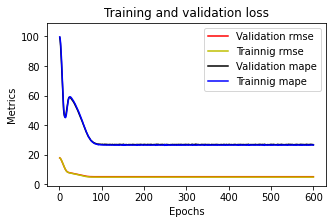

In [29]:
plotme(model2_1)

In [24]:
# inputs: distance + hour
model2_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model2_2

Epoch 1/500
406/406 [==============================] - 1s 863us/step - loss: 1138420.3750 - mape: 99.7613 - rmse: 1066.9679 - val_loss: 1154719.0000 - val_mape: 99.4386 - val_rmse: 1074.5785
Epoch 2/500
406/406 [==============================] - 0s 765us/step - loss: 1126456.1250 - mape: 98.8338 - rmse: 1061.3463 - val_loss: 1137155.5000 - val_mape: 98.0755 - val_rmse: 1066.3749
Epoch 3/500
406/406 [==============================] - 0s 717us/step - loss: 1103467.7500 - mape: 97.0716 - rmse: 1050.4607 - val_loss: 1109242.3750 - val_mape: 95.8853 - val_rmse: 1053.2058
Epoch 4/500
406/406 [==============================] - 0s 713us/step - loss: 1071457.5000 - mape: 94.5254 - rmse: 1035.1123 - val_loss: 1073703.0000 - val_mape: 93.0400 - val_rmse: 1036.1964
Epoch 5/500
406/406 [==============================] - 0s 709us/step - loss: 1032866.2500 - mape: 91.4322 - rmse: 1016.3003 - val_loss: 1032455.1875 - val_mape: 89.6560 - val_rmse: 1016.0980
Epoch 6/500
406/406 [========================

406/406 [==============================] - 0s 711us/step - loss: 179845.6406 - mape: 54.5056 - rmse: 424.0821 - val_loss: 186045.7969 - val_mape: 53.9856 - val_rmse: 431.3303
Epoch 45/500
406/406 [==============================] - 0s 716us/step - loss: 177036.4375 - mape: 54.1593 - rmse: 420.7570 - val_loss: 183270.3594 - val_mape: 53.4870 - val_rmse: 428.1009
Epoch 46/500
406/406 [==============================] - 0s 704us/step - loss: 174227.5156 - mape: 53.5962 - rmse: 417.4057 - val_loss: 180474.0938 - val_mape: 53.0281 - val_rmse: 424.8224
Epoch 47/500
406/406 [==============================] - 0s 716us/step - loss: 171404.1406 - mape: 53.1054 - rmse: 414.0098 - val_loss: 177722.9375 - val_mape: 52.5558 - val_rmse: 421.5720
Epoch 48/500
406/406 [==============================] - 0s 740us/step - loss: 168599.2188 - mape: 52.6415 - rmse: 410.6083 - val_loss: 174980.6875 - val_mape: 51.9641 - val_rmse: 418.3069
Epoch 49/500
406/406 [==============================] - 0s 704us/step - l

Epoch 88/500
406/406 [==============================] - 0s 704us/step - loss: 89214.4141 - mape: 30.8267 - rmse: 298.6878 - val_loss: 98402.8359 - val_mape: 30.8862 - val_rmse: 313.6923
Epoch 89/500
406/406 [==============================] - 0s 715us/step - loss: 88714.2734 - mape: 30.3843 - rmse: 297.8494 - val_loss: 97913.7812 - val_mape: 30.5883 - val_rmse: 312.9118
Epoch 90/500
406/406 [==============================] - 0s 729us/step - loss: 88268.8125 - mape: 30.2647 - rmse: 297.1007 - val_loss: 97522.1562 - val_mape: 30.2358 - val_rmse: 312.2854
Epoch 91/500
406/406 [==============================] - 0s 728us/step - loss: 87883.9375 - mape: 29.9067 - rmse: 296.4522 - val_loss: 97197.4609 - val_mape: 29.8429 - val_rmse: 311.7651
Epoch 92/500
406/406 [==============================] - 0s 717us/step - loss: 87543.0312 - mape: 29.5042 - rmse: 295.8767 - val_loss: 96845.8281 - val_mape: 29.7056 - val_rmse: 311.2006
Epoch 93/500
406/406 [==============================] - 0s 756us/step 

Epoch 132/500
406/406 [==============================] - 0s 716us/step - loss: 82443.8359 - mape: 25.9363 - rmse: 287.1303 - val_loss: 92017.8203 - val_mape: 26.3232 - val_rmse: 303.3444
Epoch 133/500
406/406 [==============================] - 0s 708us/step - loss: 82396.4531 - mape: 25.9304 - rmse: 287.0478 - val_loss: 91951.0312 - val_mape: 26.3866 - val_rmse: 303.2343
Epoch 134/500
406/406 [==============================] - 0s 740us/step - loss: 82353.5859 - mape: 25.9802 - rmse: 286.9731 - val_loss: 91948.7031 - val_mape: 26.2470 - val_rmse: 303.2304
Epoch 135/500
406/406 [==============================] - 0s 710us/step - loss: 82307.7734 - mape: 25.8266 - rmse: 286.8933 - val_loss: 91892.6875 - val_mape: 26.2969 - val_rmse: 303.1381
Epoch 136/500
406/406 [==============================] - 0s 704us/step - loss: 82272.0312 - mape: 25.9074 - rmse: 286.8310 - val_loss: 91880.8516 - val_mape: 26.2010 - val_rmse: 303.1185
Epoch 137/500
406/406 [==============================] - 0s 704us

Epoch 176/500
406/406 [==============================] - 0s 715us/step - loss: 81567.1953 - mape: 25.1404 - rmse: 285.5997 - val_loss: 91388.2188 - val_mape: 25.3947 - val_rmse: 302.3048
Epoch 177/500
406/406 [==============================] - 0s 716us/step - loss: 81558.7109 - mape: 25.0614 - rmse: 285.5849 - val_loss: 91360.8906 - val_mape: 25.4368 - val_rmse: 302.2596
Epoch 178/500
406/406 [==============================] - 0s 716us/step - loss: 81553.7734 - mape: 25.0864 - rmse: 285.5762 - val_loss: 91353.7734 - val_mape: 25.4121 - val_rmse: 302.2479
Epoch 179/500
406/406 [==============================] - 0s 722us/step - loss: 81538.2656 - mape: 25.0275 - rmse: 285.5491 - val_loss: 91315.7578 - val_mape: 25.4932 - val_rmse: 302.1850
Epoch 180/500
406/406 [==============================] - 0s 710us/step - loss: 81528.8594 - mape: 24.9981 - rmse: 285.5326 - val_loss: 91315.9453 - val_mape: 25.4692 - val_rmse: 302.1853
Epoch 181/500
406/406 [==============================] - 0s 708us

Epoch 220/500
406/406 [==============================] - 0s 716us/step - loss: 81225.3984 - mape: 24.8226 - rmse: 285.0007 - val_loss: 91033.4375 - val_mape: 25.2635 - val_rmse: 301.7175
Epoch 221/500
406/406 [==============================] - 0s 704us/step - loss: 81207.0469 - mape: 25.0075 - rmse: 284.9685 - val_loss: 91094.1562 - val_mape: 25.0968 - val_rmse: 301.8181
Epoch 222/500
406/406 [==============================] - 0s 704us/step - loss: 81199.1953 - mape: 24.6968 - rmse: 284.9547 - val_loss: 90984.3984 - val_mape: 25.3534 - val_rmse: 301.6362
Epoch 223/500
406/406 [==============================] - 0s 721us/step - loss: 81202.8203 - mape: 24.9127 - rmse: 284.9611 - val_loss: 90977.2578 - val_mape: 25.3731 - val_rmse: 301.6244
Epoch 224/500
406/406 [==============================] - 0s 716us/step - loss: 81189.7031 - mape: 24.9845 - rmse: 284.9381 - val_loss: 91044.8906 - val_mape: 25.1765 - val_rmse: 301.7365
Epoch 225/500
406/406 [==============================] - 0s 716us

Epoch 264/500
406/406 [==============================] - 0s 703us/step - loss: 80942.8984 - mape: 24.7837 - rmse: 284.5047 - val_loss: 90757.7734 - val_mape: 25.2066 - val_rmse: 301.2603
Epoch 265/500
406/406 [==============================] - 0s 729us/step - loss: 80938.8594 - mape: 24.8147 - rmse: 284.4976 - val_loss: 90784.9375 - val_mape: 25.1153 - val_rmse: 301.3054
Epoch 266/500
406/406 [==============================] - 0s 717us/step - loss: 80936.2188 - mape: 24.7833 - rmse: 284.4929 - val_loss: 90798.8750 - val_mape: 25.0669 - val_rmse: 301.3285
Epoch 267/500
406/406 [==============================] - 0s 721us/step - loss: 80930.1719 - mape: 24.7618 - rmse: 284.4823 - val_loss: 90755.7969 - val_mape: 25.1494 - val_rmse: 301.2570
Epoch 268/500
406/406 [==============================] - 0s 711us/step - loss: 80918.8984 - mape: 24.7456 - rmse: 284.4625 - val_loss: 90735.2734 - val_mape: 25.1927 - val_rmse: 301.2230
Epoch 269/500
406/406 [==============================] - 0s 734us

Epoch 308/500
406/406 [==============================] - 0s 728us/step - loss: 80724.9062 - mape: 24.6478 - rmse: 284.1213 - val_loss: 90577.0625 - val_mape: 25.0015 - val_rmse: 300.9602
Epoch 309/500
406/406 [==============================] - 0s 691us/step - loss: 80719.7812 - mape: 24.6480 - rmse: 284.1123 - val_loss: 90523.7812 - val_mape: 25.1403 - val_rmse: 300.8717
Epoch 310/500
406/406 [==============================] - 0s 717us/step - loss: 80715.5391 - mape: 24.6509 - rmse: 284.1048 - val_loss: 90516.7578 - val_mape: 25.1464 - val_rmse: 300.8600
Epoch 311/500
406/406 [==============================] - 0s 715us/step - loss: 80710.0312 - mape: 24.7810 - rmse: 284.0951 - val_loss: 90516.1641 - val_mape: 25.1228 - val_rmse: 300.8590
Epoch 312/500
406/406 [==============================] - 0s 697us/step - loss: 80704.2109 - mape: 24.6574 - rmse: 284.0849 - val_loss: 90516.0547 - val_mape: 25.1083 - val_rmse: 300.8589
Epoch 313/500
406/406 [==============================] - 0s 704us

Epoch 352/500
406/406 [==============================] - 0s 686us/step - loss: 80535.2656 - mape: 24.6117 - rmse: 283.7874 - val_loss: 90332.6094 - val_mape: 25.0510 - val_rmse: 300.5538
Epoch 353/500
406/406 [==============================] - 0s 728us/step - loss: 80532.6953 - mape: 24.6525 - rmse: 283.7828 - val_loss: 90358.1016 - val_mape: 24.9883 - val_rmse: 300.5963
Epoch 354/500
406/406 [==============================] - 0s 692us/step - loss: 80531.0078 - mape: 24.6608 - rmse: 283.7798 - val_loss: 90353.3281 - val_mape: 24.9923 - val_rmse: 300.5883
Epoch 355/500
406/406 [==============================] - 0s 716us/step - loss: 80528.5078 - mape: 24.6649 - rmse: 283.7755 - val_loss: 90378.4141 - val_mape: 24.9400 - val_rmse: 300.6300
Epoch 356/500
406/406 [==============================] - 0s 716us/step - loss: 80520.5938 - mape: 24.5958 - rmse: 283.7615 - val_loss: 90334.5547 - val_mape: 25.0330 - val_rmse: 300.5571
Epoch 357/500
406/406 [==============================] - 0s 702us

Epoch 396/500
406/406 [==============================] - 0s 728us/step - loss: 80390.5469 - mape: 24.5338 - rmse: 283.5323 - val_loss: 90187.3516 - val_mape: 24.9783 - val_rmse: 300.3121
Epoch 397/500
406/406 [==============================] - 0s 724us/step - loss: 80389.8672 - mape: 24.5761 - rmse: 283.5311 - val_loss: 90200.4297 - val_mape: 24.9426 - val_rmse: 300.3339
Epoch 398/500
406/406 [==============================] - 0s 703us/step - loss: 80387.3125 - mape: 24.5864 - rmse: 283.5266 - val_loss: 90205.9609 - val_mape: 24.9500 - val_rmse: 300.3431
Epoch 399/500
406/406 [==============================] - 0s 716us/step - loss: 80382.5234 - mape: 24.6302 - rmse: 283.5181 - val_loss: 90226.2422 - val_mape: 24.8716 - val_rmse: 300.3768
Epoch 400/500
406/406 [==============================] - 0s 729us/step - loss: 80381.9531 - mape: 24.5290 - rmse: 283.5171 - val_loss: 90203.6328 - val_mape: 24.9021 - val_rmse: 300.3392
Epoch 401/500
406/406 [==============================] - 0s 691us

Epoch 440/500
406/406 [==============================] - 0s 716us/step - loss: 80272.6328 - mape: 24.5716 - rmse: 283.3242 - val_loss: 90050.3984 - val_mape: 24.9402 - val_rmse: 300.0840
Epoch 441/500
406/406 [==============================] - 0s 715us/step - loss: 80267.6797 - mape: 24.5273 - rmse: 283.3155 - val_loss: 90039.9219 - val_mape: 24.9563 - val_rmse: 300.0665
Epoch 442/500
406/406 [==============================] - 0s 716us/step - loss: 80266.2656 - mape: 24.5011 - rmse: 283.3130 - val_loss: 90051.7656 - val_mape: 24.9257 - val_rmse: 300.0863
Epoch 443/500
406/406 [==============================] - 0s 718us/step - loss: 80263.0547 - mape: 24.5930 - rmse: 283.3073 - val_loss: 90078.2734 - val_mape: 24.8370 - val_rmse: 300.1304
Epoch 444/500
406/406 [==============================] - 0s 741us/step - loss: 80259.8906 - mape: 24.4615 - rmse: 283.3018 - val_loss: 90021.5547 - val_mape: 24.9943 - val_rmse: 300.0359
Epoch 445/500
406/406 [==============================] - 0s 704us

Epoch 484/500
406/406 [==============================] - 0s 703us/step - loss: 80160.5547 - mape: 24.4399 - rmse: 283.1264 - val_loss: 89947.9219 - val_mape: 24.9357 - val_rmse: 299.9132
Epoch 485/500
406/406 [==============================] - 0s 703us/step - loss: 80164.0391 - mape: 24.4714 - rmse: 283.1325 - val_loss: 89935.1484 - val_mape: 24.9506 - val_rmse: 299.8919
Epoch 486/500
406/406 [==============================] - 0s 705us/step - loss: 80159.1094 - mape: 24.6053 - rmse: 283.1238 - val_loss: 89981.3594 - val_mape: 24.7950 - val_rmse: 299.9689
Epoch 487/500
406/406 [==============================] - 0s 716us/step - loss: 80159.5547 - mape: 24.4779 - rmse: 283.1246 - val_loss: 89994.0312 - val_mape: 24.7675 - val_rmse: 299.9901
Epoch 488/500
406/406 [==============================] - 0s 715us/step - loss: 80157.5469 - mape: 24.4870 - rmse: 283.1211 - val_loss: 89988.9609 - val_mape: 24.7939 - val_rmse: 299.9816
Epoch 489/500
406/406 [==============================] - 0s 716us

In [25]:
# plotme(model2_2)

In [26]:
# inputs: distance + hour
model2_3 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
406/406 [==============================] - 1s 864us/step - loss: 1139570.0000 - mape: 99.8576 - rmse: 1067.5065 - val_loss: 1157290.0000 - val_mape: 99.6456 - val_rmse: 1075.7742
Epoch 2/500
406/406 [==============================] - 0s 728us/step - loss: 1132602.6250 - mape: 99.3273 - rmse: 1064.2380 - val_loss: 1147909.8750 - val_mape: 98.9358 - val_rmse: 1071.4055
Epoch 3/500
406/406 [==============================] - 0s 732us/step - loss: 1120556.3750 - mape: 98.4169 - rmse: 1058.5634 - val_loss: 1133104.1250 - val_mape: 97.8124 - val_rmse: 1064.4736
Epoch 4/500
406/406 [==============================] - 0s 713us/step - loss: 1103578.2500 - mape: 97.1221 - rmse: 1050.5133 - val_loss: 1114091.8750 - val_mape: 96.3461 - val_rmse: 1055.5055
Epoch 5/500
406/406 [==============================] - 0s 696us/step - loss: 1082811.3750 - mape: 95.5184 - rmse: 1040.5823 - val_loss: 1091553.6250 - val_mape: 94.5822 - val_rmse: 1044.7744
Epoch 6/500
406/406 [========================

406/406 [==============================] - 0s 703us/step - loss: 223132.7656 - mape: 59.4877 - rmse: 472.3693 - val_loss: 231229.2188 - val_mape: 59.3853 - val_rmse: 480.8630
Epoch 45/500
406/406 [==============================] - 0s 694us/step - loss: 220891.8125 - mape: 59.5004 - rmse: 469.9913 - val_loss: 228758.2656 - val_mape: 59.4938 - val_rmse: 478.2868
Epoch 46/500
406/406 [==============================] - 0s 706us/step - loss: 218805.2188 - mape: 59.7193 - rmse: 467.7662 - val_loss: 226467.9844 - val_mape: 59.4926 - val_rmse: 475.8865
Epoch 47/500
406/406 [==============================] - 0s 695us/step - loss: 216841.0156 - mape: 59.7365 - rmse: 465.6619 - val_loss: 224336.5625 - val_mape: 59.3671 - val_rmse: 473.6418
Epoch 48/500
406/406 [==============================] - 0s 696us/step - loss: 214961.0156 - mape: 59.6223 - rmse: 463.6389 - val_loss: 222268.2812 - val_mape: 59.2742 - val_rmse: 471.4534
Epoch 49/500
406/406 [==============================] - 0s 718us/step - l

Epoch 88/500
406/406 [==============================] - 0s 731us/step - loss: 147436.4062 - mape: 49.0565 - rmse: 383.9745 - val_loss: 154519.9062 - val_mape: 48.5788 - val_rmse: 393.0902
Epoch 89/500
406/406 [==============================] - 0s 701us/step - loss: 145663.2344 - mape: 48.5980 - rmse: 381.6585 - val_loss: 152792.2656 - val_mape: 48.1822 - val_rmse: 390.8865
Epoch 90/500
406/406 [==============================] - 0s 741us/step - loss: 143895.5938 - mape: 48.2747 - rmse: 379.3357 - val_loss: 151074.4219 - val_mape: 47.7958 - val_rmse: 388.6829
Epoch 91/500
406/406 [==============================] - 0s 720us/step - loss: 142149.2969 - mape: 47.8253 - rmse: 377.0269 - val_loss: 149384.0156 - val_mape: 47.4190 - val_rmse: 386.5023
Epoch 92/500
406/406 [==============================] - 0s 748us/step - loss: 140423.1094 - mape: 47.5132 - rmse: 374.7307 - val_loss: 147706.7812 - val_mape: 47.0841 - val_rmse: 384.3264
Epoch 93/500
406/406 [==============================] - 0s 7

406/406 [==============================] - 0s 731us/step - loss: 91272.1953 - mape: 32.2629 - rmse: 302.1129 - val_loss: 100386.1094 - val_mape: 32.3330 - val_rmse: 316.8377
Epoch 132/500
406/406 [==============================] - 0s 715us/step - loss: 90764.8359 - mape: 31.9136 - rmse: 301.2720 - val_loss: 99899.0703 - val_mape: 32.0693 - val_rmse: 316.0681
Epoch 133/500
406/406 [==============================] - 0s 717us/step - loss: 90297.8125 - mape: 31.7330 - rmse: 300.4959 - val_loss: 99493.0625 - val_mape: 31.7261 - val_rmse: 315.4252
Epoch 134/500
406/406 [==============================] - 0s 717us/step - loss: 89866.2734 - mape: 31.4345 - rmse: 299.7770 - val_loss: 99083.8594 - val_mape: 31.4912 - val_rmse: 314.7759
Epoch 135/500
406/406 [==============================] - 0s 715us/step - loss: 89467.9219 - mape: 31.0526 - rmse: 299.1119 - val_loss: 98694.5156 - val_mape: 31.2958 - val_rmse: 314.1568
Epoch 136/500
406/406 [==============================] - 0s 702us/step - loss:

Epoch 175/500
406/406 [==============================] - 0s 729us/step - loss: 85904.4922 - mape: 26.8472 - rmse: 293.0947 - val_loss: 95553.2812 - val_mape: 27.1589 - val_rmse: 309.1169
Epoch 176/500
406/406 [==============================] - 0s 697us/step - loss: 85897.9688 - mape: 26.7827 - rmse: 293.0836 - val_loss: 95543.0703 - val_mape: 27.1646 - val_rmse: 309.1004
Epoch 177/500
406/406 [==============================] - 0s 741us/step - loss: 85898.6016 - mape: 26.7949 - rmse: 293.0846 - val_loss: 95541.7188 - val_mape: 27.1369 - val_rmse: 309.0982
Epoch 178/500
406/406 [==============================] - 0s 749us/step - loss: 85897.7109 - mape: 26.8421 - rmse: 293.0831 - val_loss: 95532.9141 - val_mape: 27.1382 - val_rmse: 309.0840
Epoch 179/500
406/406 [==============================] - 0s 737us/step - loss: 85894.2031 - mape: 26.7348 - rmse: 293.0771 - val_loss: 95522.6406 - val_mape: 27.1396 - val_rmse: 309.0674
Epoch 180/500
406/406 [==============================] - 0s 732us

Epoch 219/500
406/406 [==============================] - 0s 692us/step - loss: 85880.3125 - mape: 26.5257 - rmse: 293.0534 - val_loss: 95514.6406 - val_mape: 26.9548 - val_rmse: 309.0544
Epoch 220/500
406/406 [==============================] - 0s 739us/step - loss: 85883.2109 - mape: 26.5662 - rmse: 293.0584 - val_loss: 95504.3438 - val_mape: 26.9784 - val_rmse: 309.0378
Epoch 221/500
406/406 [==============================] - 0s 739us/step - loss: 85883.8125 - mape: 26.6051 - rmse: 293.0594 - val_loss: 95529.7188 - val_mape: 26.9025 - val_rmse: 309.0788
Epoch 222/500
406/406 [==============================] - 0s 729us/step - loss: 85884.4375 - mape: 26.5475 - rmse: 293.0605 - val_loss: 95556.6719 - val_mape: 26.8448 - val_rmse: 309.1224
Epoch 223/500
406/406 [==============================] - 0s 709us/step - loss: 85882.2109 - mape: 26.5346 - rmse: 293.0567 - val_loss: 95540.9062 - val_mape: 26.8802 - val_rmse: 309.0969
Epoch 224/500
406/406 [==============================] - 0s 695us

Epoch 263/500
406/406 [==============================] - 0s 728us/step - loss: 85883.0078 - mape: 26.5485 - rmse: 293.0580 - val_loss: 95520.1875 - val_mape: 26.9233 - val_rmse: 309.0634
Epoch 264/500
406/406 [==============================] - 0s 716us/step - loss: 85881.8359 - mape: 26.6044 - rmse: 293.0560 - val_loss: 95546.5781 - val_mape: 26.8456 - val_rmse: 309.1061
Epoch 265/500
406/406 [==============================] - 0s 741us/step - loss: 85885.1875 - mape: 26.5186 - rmse: 293.0617 - val_loss: 95545.7734 - val_mape: 26.8499 - val_rmse: 309.1048
Epoch 266/500
406/406 [==============================] - 0s 716us/step - loss: 85881.7891 - mape: 26.6022 - rmse: 293.0559 - val_loss: 95550.7656 - val_mape: 26.8352 - val_rmse: 309.1129
Epoch 267/500
406/406 [==============================] - 0s 684us/step - loss: 85882.5781 - mape: 26.4653 - rmse: 293.0573 - val_loss: 95539.4375 - val_mape: 26.8660 - val_rmse: 309.0945
Epoch 268/500
406/406 [==============================] - 0s 727us

Epoch 307/500
406/406 [==============================] - 0s 713us/step - loss: 85881.5703 - mape: 26.5231 - rmse: 293.0556 - val_loss: 95519.8516 - val_mape: 26.9145 - val_rmse: 309.0629
Epoch 308/500
406/406 [==============================] - 0s 703us/step - loss: 85882.0547 - mape: 26.5567 - rmse: 293.0564 - val_loss: 95527.8438 - val_mape: 26.8966 - val_rmse: 309.0758
Epoch 309/500
406/406 [==============================] - 0s 716us/step - loss: 85882.1250 - mape: 26.5755 - rmse: 293.0565 - val_loss: 95535.6016 - val_mape: 26.8792 - val_rmse: 309.0883
Epoch 310/500
406/406 [==============================] - 0s 715us/step - loss: 85882.7266 - mape: 26.5145 - rmse: 293.0576 - val_loss: 95525.5859 - val_mape: 26.9000 - val_rmse: 309.0721
Epoch 311/500
406/406 [==============================] - 0s 704us/step - loss: 85884.5391 - mape: 26.5026 - rmse: 293.0606 - val_loss: 95505.0391 - val_mape: 26.9586 - val_rmse: 309.0389
Epoch 312/500
406/406 [==============================] - 0s 716us

Epoch 351/500
406/406 [==============================] - 0s 725us/step - loss: 85881.5234 - mape: 26.5337 - rmse: 293.0555 - val_loss: 95538.2734 - val_mape: 26.8681 - val_rmse: 309.0927
Epoch 352/500
406/406 [==============================] - 0s 709us/step - loss: 85883.8281 - mape: 26.5391 - rmse: 293.0594 - val_loss: 95537.6328 - val_mape: 26.8723 - val_rmse: 309.0916
Epoch 353/500
406/406 [==============================] - 0s 715us/step - loss: 85881.6016 - mape: 26.5811 - rmse: 293.0556 - val_loss: 95544.6641 - val_mape: 26.8564 - val_rmse: 309.1030
Epoch 354/500
406/406 [==============================] - 0s 732us/step - loss: 85884.2266 - mape: 26.4518 - rmse: 293.0601 - val_loss: 95513.2031 - val_mape: 26.9298 - val_rmse: 309.0521
Epoch 355/500
406/406 [==============================] - 0s 720us/step - loss: 85879.2031 - mape: 26.5887 - rmse: 293.0515 - val_loss: 95537.8984 - val_mape: 26.8757 - val_rmse: 309.0920
Epoch 356/500
406/406 [==============================] - 0s 691us

Epoch 395/500
406/406 [==============================] - 0s 715us/step - loss: 85879.5391 - mape: 26.4321 - rmse: 293.0521 - val_loss: 95502.6641 - val_mape: 26.9573 - val_rmse: 309.0351
Epoch 396/500
406/406 [==============================] - 0s 716us/step - loss: 85880.9141 - mape: 26.6731 - rmse: 293.0544 - val_loss: 95538.5156 - val_mape: 26.8691 - val_rmse: 309.0930
Epoch 397/500
406/406 [==============================] - 0s 704us/step - loss: 85879.5703 - mape: 26.5515 - rmse: 293.0522 - val_loss: 95546.9922 - val_mape: 26.8342 - val_rmse: 309.1068
Epoch 398/500
406/406 [==============================] - 0s 691us/step - loss: 85881.1797 - mape: 26.5843 - rmse: 293.0549 - val_loss: 95541.3281 - val_mape: 26.8577 - val_rmse: 309.0976
Epoch 399/500
406/406 [==============================] - 0s 716us/step - loss: 85883.4766 - mape: 26.5543 - rmse: 293.0588 - val_loss: 95561.7266 - val_mape: 26.8059 - val_rmse: 309.1306
Epoch 400/500
406/406 [==============================] - 0s 741us

Epoch 439/500
406/406 [==============================] - 0s 692us/step - loss: 85883.1875 - mape: 26.5117 - rmse: 293.0583 - val_loss: 95540.8828 - val_mape: 26.8755 - val_rmse: 309.0969
Epoch 440/500
406/406 [==============================] - 0s 721us/step - loss: 85881.9453 - mape: 26.5589 - rmse: 293.0562 - val_loss: 95559.3125 - val_mape: 26.8262 - val_rmse: 309.1267
Epoch 441/500
406/406 [==============================] - 0s 712us/step - loss: 85882.0938 - mape: 26.5652 - rmse: 293.0565 - val_loss: 95555.0859 - val_mape: 26.8320 - val_rmse: 309.1198
Epoch 442/500
406/406 [==============================] - 0s 691us/step - loss: 85883.7500 - mape: 26.4741 - rmse: 293.0593 - val_loss: 95524.5547 - val_mape: 26.8984 - val_rmse: 309.0705
Epoch 443/500
406/406 [==============================] - 0s 716us/step - loss: 85881.4922 - mape: 26.5719 - rmse: 293.0555 - val_loss: 95525.3750 - val_mape: 26.9087 - val_rmse: 309.0718
Epoch 444/500
406/406 [==============================] - 0s 716us

Epoch 483/500
406/406 [==============================] - 0s 692us/step - loss: 85881.5391 - mape: 26.6301 - rmse: 293.0555 - val_loss: 95552.6406 - val_mape: 26.8377 - val_rmse: 309.1159
Epoch 484/500
406/406 [==============================] - 0s 724us/step - loss: 85883.8516 - mape: 26.4605 - rmse: 293.0595 - val_loss: 95539.9062 - val_mape: 26.8613 - val_rmse: 309.0953
Epoch 485/500
406/406 [==============================] - 0s 703us/step - loss: 85882.9453 - mape: 26.5349 - rmse: 293.0579 - val_loss: 95532.0625 - val_mape: 26.8905 - val_rmse: 309.0826
Epoch 486/500
406/406 [==============================] - 0s 692us/step - loss: 85882.5391 - mape: 26.5512 - rmse: 293.0572 - val_loss: 95535.0391 - val_mape: 26.8859 - val_rmse: 309.0874
Epoch 487/500
406/406 [==============================] - 0s 703us/step - loss: 85880.6328 - mape: 26.5372 - rmse: 293.0540 - val_loss: 95531.8594 - val_mape: 26.8923 - val_rmse: 309.0823
Epoch 488/500
406/406 [==============================] - 0s 720us

In [27]:
# inputs: distance + hour
model2_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
406/406 [==============================] - 1s 861us/step - loss: 1129397.6250 - mape: 99.0270 - rmse: 1062.7312 - val_loss: 1119596.8750 - val_mape: 96.6217 - val_rmse: 1058.1101
Epoch 2/500
406/406 [==============================] - 0s 766us/step - loss: 1007227.7500 - mape: 88.8582 - rmse: 1003.6074 - val_loss: 897918.6875 - val_mape: 77.6780 - val_rmse: 947.5857
Epoch 3/500
406/406 [==============================] - 0s 765us/step - loss: 704941.3750 - mape: 61.3391 - rmse: 839.6078 - val_loss: 551182.1250 - val_mape: 48.3294 - val_rmse: 742.4164
Epoch 4/500
406/406 [==============================] - 0s 760us/step - loss: 408536.6562 - mape: 46.5643 - rmse: 639.1687 - val_loss: 334739.5938 - val_mape: 49.4639 - val_rmse: 578.5668
Epoch 5/500
406/406 [==============================] - 0s 718us/step - loss: 276783.6562 - mape: 52.7029 - rmse: 526.1023 - val_loss: 261614.1406 - val_mape: 56.8879 - val_rmse: 511.4823
Epoch 6/500
406/406 [==============================] - 0s 7

Epoch 45/500
406/406 [==============================] - 0s 731us/step - loss: 85935.8125 - mape: 26.6954 - rmse: 293.1481 - val_loss: 95795.9766 - val_mape: 26.5133 - val_rmse: 309.5092
Epoch 46/500
406/406 [==============================] - 0s 795us/step - loss: 85956.3047 - mape: 26.5503 - rmse: 293.1830 - val_loss: 95531.1641 - val_mape: 27.0603 - val_rmse: 309.0811
Epoch 47/500
406/406 [==============================] - 0s 744us/step - loss: 85939.1953 - mape: 26.6238 - rmse: 293.1539 - val_loss: 95568.9688 - val_mape: 26.8613 - val_rmse: 309.1423
Epoch 48/500
406/406 [==============================] - 0s 732us/step - loss: 85921.1172 - mape: 26.6226 - rmse: 293.1230 - val_loss: 95502.0234 - val_mape: 27.1592 - val_rmse: 309.0340
Epoch 49/500
406/406 [==============================] - 0s 707us/step - loss: 85959.4844 - mape: 26.6120 - rmse: 293.1885 - val_loss: 95673.8281 - val_mape: 26.6447 - val_rmse: 309.3119
Epoch 50/500
406/406 [==============================] - 0s 716us/step 

406/406 [==============================] - 0s 692us/step - loss: 85960.8594 - mape: 26.6052 - rmse: 293.1908 - val_loss: 95376.1328 - val_mape: 27.3070 - val_rmse: 308.8303
Epoch 90/500
406/406 [==============================] - 0s 691us/step - loss: 85945.0234 - mape: 26.6162 - rmse: 293.1638 - val_loss: 95532.4453 - val_mape: 26.9156 - val_rmse: 309.0832
Epoch 91/500
406/406 [==============================] - 0s 679us/step - loss: 85945.2578 - mape: 26.5926 - rmse: 293.1642 - val_loss: 95476.8750 - val_mape: 27.1617 - val_rmse: 308.9933
Epoch 92/500
406/406 [==============================] - 0s 667us/step - loss: 85949.1094 - mape: 26.6195 - rmse: 293.1708 - val_loss: 95437.2188 - val_mape: 27.0409 - val_rmse: 308.9291
Epoch 93/500
406/406 [==============================] - 0s 713us/step - loss: 85944.6562 - mape: 26.5370 - rmse: 293.1632 - val_loss: 95465.3828 - val_mape: 26.9789 - val_rmse: 308.9747
Epoch 94/500
406/406 [==============================] - 0s 732us/step - loss: 85912

Epoch 133/500
406/406 [==============================] - 0s 719us/step - loss: 85936.8359 - mape: 26.5605 - rmse: 293.1498 - val_loss: 95595.0391 - val_mape: 26.7642 - val_rmse: 309.1845
Epoch 134/500
406/406 [==============================] - 0s 671us/step - loss: 85958.6719 - mape: 26.5493 - rmse: 293.1871 - val_loss: 95545.5859 - val_mape: 26.8656 - val_rmse: 309.1045
Epoch 135/500
406/406 [==============================] - 0s 716us/step - loss: 85931.2188 - mape: 26.6118 - rmse: 293.1403 - val_loss: 95698.0078 - val_mape: 26.5353 - val_rmse: 309.3510
Epoch 136/500
406/406 [==============================] - 0s 713us/step - loss: 85946.8438 - mape: 26.4987 - rmse: 293.1669 - val_loss: 95512.0938 - val_mape: 26.8853 - val_rmse: 309.0503
Epoch 137/500
406/406 [==============================] - 0s 712us/step - loss: 85914.1641 - mape: 26.6647 - rmse: 293.1112 - val_loss: 95836.9062 - val_mape: 26.3400 - val_rmse: 309.5754
Epoch 138/500
406/406 [==============================] - 0s 729us

Epoch 177/500
406/406 [==============================] - 0s 731us/step - loss: 85947.3438 - mape: 26.5486 - rmse: 293.1678 - val_loss: 95767.1484 - val_mape: 26.4668 - val_rmse: 309.4627
Epoch 178/500
406/406 [==============================] - 0s 720us/step - loss: 85954.5156 - mape: 26.5776 - rmse: 293.1800 - val_loss: 95468.1484 - val_mape: 26.9799 - val_rmse: 308.9792
Epoch 179/500
406/406 [==============================] - 0s 730us/step - loss: 85947.9375 - mape: 26.5960 - rmse: 293.1688 - val_loss: 95633.0625 - val_mape: 26.6968 - val_rmse: 309.2460
Epoch 180/500
406/406 [==============================] - 0s 721us/step - loss: 85942.6172 - mape: 26.5350 - rmse: 293.1597 - val_loss: 95586.3672 - val_mape: 26.8434 - val_rmse: 309.1704
Epoch 181/500
406/406 [==============================] - 0s 723us/step - loss: 85934.7891 - mape: 26.6365 - rmse: 293.1464 - val_loss: 95603.2109 - val_mape: 26.7089 - val_rmse: 309.1977
Epoch 182/500
406/406 [==============================] - 0s 729us

Epoch 221/500
406/406 [==============================] - 0s 717us/step - loss: 85943.7578 - mape: 26.5602 - rmse: 293.1617 - val_loss: 95545.2109 - val_mape: 26.8660 - val_rmse: 309.1039
Epoch 222/500
406/406 [==============================] - 0s 740us/step - loss: 85938.9844 - mape: 26.6675 - rmse: 293.1535 - val_loss: 95659.1250 - val_mape: 26.6307 - val_rmse: 309.2881
Epoch 223/500
406/406 [==============================] - 0s 754us/step - loss: 85953.5938 - mape: 26.4281 - rmse: 293.1784 - val_loss: 95428.8672 - val_mape: 27.0641 - val_rmse: 308.9156
Epoch 224/500
406/406 [==============================] - 0s 716us/step - loss: 85921.4688 - mape: 26.6774 - rmse: 293.1236 - val_loss: 95809.6328 - val_mape: 26.4213 - val_rmse: 309.5313
Epoch 225/500
406/406 [==============================] - 0s 754us/step - loss: 85945.7500 - mape: 26.5085 - rmse: 293.1651 - val_loss: 95485.6172 - val_mape: 26.9316 - val_rmse: 309.0075
Epoch 226/500
406/406 [==============================] - 0s 716us

Epoch 265/500
406/406 [==============================] - 0s 733us/step - loss: 85942.1406 - mape: 26.5844 - rmse: 293.1589 - val_loss: 95695.9531 - val_mape: 26.6063 - val_rmse: 309.3476
Epoch 266/500
406/406 [==============================] - 0s 744us/step - loss: 85941.1953 - mape: 26.5451 - rmse: 293.1573 - val_loss: 95703.0938 - val_mape: 26.4795 - val_rmse: 309.3592
Epoch 267/500
406/406 [==============================] - 0s 762us/step - loss: 85938.2266 - mape: 26.5420 - rmse: 293.1522 - val_loss: 95637.4141 - val_mape: 26.6877 - val_rmse: 309.2530
Epoch 268/500
406/406 [==============================] - 0s 732us/step - loss: 85940.9922 - mape: 26.5571 - rmse: 293.1570 - val_loss: 95481.8047 - val_mape: 27.0430 - val_rmse: 309.0013
Epoch 269/500
406/406 [==============================] - 0s 731us/step - loss: 85961.1797 - mape: 26.6579 - rmse: 293.1914 - val_loss: 95545.3906 - val_mape: 26.8263 - val_rmse: 309.1042
Epoch 270/500
406/406 [==============================] - 0s 733us

Epoch 309/500
406/406 [==============================] - 0s 681us/step - loss: 85884.9922 - mape: 26.6898 - rmse: 293.0614 - val_loss: 96014.9531 - val_mape: 26.0933 - val_rmse: 309.8628
Epoch 310/500
406/406 [==============================] - 0s 685us/step - loss: 85940.4688 - mape: 26.4916 - rmse: 293.1560 - val_loss: 95586.2656 - val_mape: 26.8556 - val_rmse: 309.1703
Epoch 311/500
406/406 [==============================] - 0s 679us/step - loss: 85900.4844 - mape: 26.4461 - rmse: 293.0878 - val_loss: 95358.1172 - val_mape: 27.8723 - val_rmse: 308.8011
Epoch 312/500
406/406 [==============================] - 0s 658us/step - loss: 85946.3594 - mape: 26.7180 - rmse: 293.1661 - val_loss: 95862.1328 - val_mape: 26.3468 - val_rmse: 309.6161
Epoch 313/500
406/406 [==============================] - 0s 660us/step - loss: 85900.0703 - mape: 26.5915 - rmse: 293.0871 - val_loss: 95812.8594 - val_mape: 26.4138 - val_rmse: 309.5365
Epoch 314/500
406/406 [==============================] - 0s 703us

Epoch 353/500
406/406 [==============================] - 0s 724us/step - loss: 85938.9375 - mape: 26.5705 - rmse: 293.1534 - val_loss: 95510.3594 - val_mape: 26.8806 - val_rmse: 309.0475
Epoch 354/500
406/406 [==============================] - 0s 725us/step - loss: 85964.2266 - mape: 26.5541 - rmse: 293.1966 - val_loss: 95531.2422 - val_mape: 27.0779 - val_rmse: 309.0813
Epoch 355/500
406/406 [==============================] - 0s 741us/step - loss: 85950.5703 - mape: 26.5579 - rmse: 293.1733 - val_loss: 95415.9062 - val_mape: 27.1424 - val_rmse: 308.8947
Epoch 356/500
406/406 [==============================] - 0s 728us/step - loss: 85944.2891 - mape: 26.6361 - rmse: 293.1626 - val_loss: 95628.6172 - val_mape: 26.6339 - val_rmse: 309.2388
Epoch 357/500
406/406 [==============================] - 0s 736us/step - loss: 85944.5703 - mape: 26.5654 - rmse: 293.1631 - val_loss: 95679.1641 - val_mape: 26.5904 - val_rmse: 309.3205
Epoch 358/500
406/406 [==============================] - 0s 715us

Epoch 397/500
406/406 [==============================] - 0s 666us/step - loss: 85957.2188 - mape: 26.6762 - rmse: 293.1846 - val_loss: 95645.7031 - val_mape: 26.6286 - val_rmse: 309.2664
Epoch 398/500
406/406 [==============================] - 0s 667us/step - loss: 85907.7891 - mape: 26.4462 - rmse: 293.1003 - val_loss: 95377.6094 - val_mape: 27.3927 - val_rmse: 308.8326
Epoch 399/500
406/406 [==============================] - 0s 666us/step - loss: 85954.0703 - mape: 26.5785 - rmse: 293.1793 - val_loss: 95506.2656 - val_mape: 26.9509 - val_rmse: 309.0409
Epoch 400/500
406/406 [==============================] - 0s 679us/step - loss: 85925.0078 - mape: 26.5930 - rmse: 293.1297 - val_loss: 95404.4766 - val_mape: 27.2381 - val_rmse: 308.8762
Epoch 401/500
406/406 [==============================] - 0s 666us/step - loss: 85905.5859 - mape: 26.5096 - rmse: 293.0966 - val_loss: 95397.2266 - val_mape: 27.3969 - val_rmse: 308.8644
Epoch 402/500
406/406 [==============================] - 0s 732us

Epoch 441/500
406/406 [==============================] - 0s 705us/step - loss: 85933.6641 - mape: 26.5370 - rmse: 293.1444 - val_loss: 95554.8750 - val_mape: 26.9175 - val_rmse: 309.1195
Epoch 442/500
406/406 [==============================] - 0s 714us/step - loss: 85948.8125 - mape: 26.5017 - rmse: 293.1703 - val_loss: 95376.2188 - val_mape: 27.2332 - val_rmse: 308.8304
Epoch 443/500
406/406 [==============================] - 0s 703us/step - loss: 85963.1562 - mape: 26.6427 - rmse: 293.1947 - val_loss: 95537.6328 - val_mape: 26.7482 - val_rmse: 309.0916
Epoch 444/500
406/406 [==============================] - 0s 693us/step - loss: 85971.2500 - mape: 26.5023 - rmse: 293.2086 - val_loss: 95552.7656 - val_mape: 26.8109 - val_rmse: 309.1161
Epoch 445/500
406/406 [==============================] - 0s 715us/step - loss: 85958.5391 - mape: 26.6555 - rmse: 293.1869 - val_loss: 95612.8047 - val_mape: 26.6736 - val_rmse: 309.2132
Epoch 446/500
406/406 [==============================] - 0s 692us

Epoch 485/500
406/406 [==============================] - 0s 743us/step - loss: 85923.5391 - mape: 26.5523 - rmse: 293.1272 - val_loss: 95534.4375 - val_mape: 26.9422 - val_rmse: 309.0865
Epoch 486/500
406/406 [==============================] - 0s 726us/step - loss: 85945.7969 - mape: 26.5936 - rmse: 293.1651 - val_loss: 95535.5234 - val_mape: 26.8671 - val_rmse: 309.0882
Epoch 487/500
406/406 [==============================] - 0s 729us/step - loss: 85929.1953 - mape: 26.5226 - rmse: 293.1368 - val_loss: 95682.5547 - val_mape: 26.6195 - val_rmse: 309.3260
Epoch 488/500
406/406 [==============================] - 0s 703us/step - loss: 85934.8203 - mape: 26.5551 - rmse: 293.1464 - val_loss: 95491.9688 - val_mape: 26.9964 - val_rmse: 309.0178
Epoch 489/500
406/406 [==============================] - 0s 695us/step - loss: 85916.7188 - mape: 26.5337 - rmse: 293.1155 - val_loss: 95409.4922 - val_mape: 27.1190 - val_rmse: 308.8843
Epoch 490/500
406/406 [==============================] - 0s 668us

In [28]:
# inputs: distance + hour
model2_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
406/406 [==============================] - 1s 885us/step - loss: 1120573.6250 - mape: 98.3288 - rmse: 1058.5715 - val_loss: 1072328.1250 - val_mape: 92.9020 - val_rmse: 1035.5327
Epoch 2/500
406/406 [==============================] - 0s 741us/step - loss: 830985.4375 - mape: 73.1045 - rmse: 911.5840 - val_loss: 590501.8750 - val_mape: 51.1722 - val_rmse: 768.4412
Epoch 3/500
406/406 [==============================] - 0s 741us/step - loss: 392366.0312 - mape: 48.5427 - rmse: 626.3913 - val_loss: 297269.6875 - val_mape: 52.7780 - val_rmse: 545.2244
Epoch 4/500
406/406 [==============================] - 0s 741us/step - loss: 245692.0781 - mape: 56.2727 - rmse: 495.6734 - val_loss: 234432.6875 - val_mape: 58.9540 - val_rmse: 484.1825
Epoch 5/500
406/406 [==============================] - 0s 741us/step - loss: 214960.5625 - mape: 59.6635 - rmse: 463.6384 - val_loss: 215319.7500 - val_mape: 58.1874 - val_rmse: 464.0256
Epoch 6/500
406/406 [==============================] - 0s 755

Epoch 45/500
406/406 [==============================] - 0s 728us/step - loss: 83661.8047 - mape: 25.7609 - rmse: 289.2435 - val_loss: 93227.9531 - val_mape: 26.0586 - val_rmse: 305.3325
Epoch 46/500
406/406 [==============================] - 0s 723us/step - loss: 83590.9531 - mape: 25.6870 - rmse: 289.1210 - val_loss: 93178.8281 - val_mape: 26.2673 - val_rmse: 305.2521
Epoch 47/500
406/406 [==============================] - 0s 741us/step - loss: 83548.4219 - mape: 25.7334 - rmse: 289.0474 - val_loss: 93432.3594 - val_mape: 25.7560 - val_rmse: 305.6671
Epoch 48/500
406/406 [==============================] - 0s 741us/step - loss: 83485.1797 - mape: 25.6756 - rmse: 288.9380 - val_loss: 92999.3750 - val_mape: 26.3164 - val_rmse: 304.9580
Epoch 49/500
406/406 [==============================] - 0s 738us/step - loss: 83404.1250 - mape: 25.5743 - rmse: 288.7977 - val_loss: 92858.2266 - val_mape: 27.0242 - val_rmse: 304.7265
Epoch 50/500
406/406 [==============================] - 0s 747us/step 

406/406 [==============================] - 0s 703us/step - loss: 81731.7031 - mape: 25.1647 - rmse: 285.8876 - val_loss: 91456.2891 - val_mape: 25.7609 - val_rmse: 302.4174
Epoch 90/500
406/406 [==============================] - 0s 681us/step - loss: 81682.8984 - mape: 25.0900 - rmse: 285.8022 - val_loss: 91397.1328 - val_mape: 25.4748 - val_rmse: 302.3196
Epoch 91/500
406/406 [==============================] - 0s 695us/step - loss: 81680.7734 - mape: 25.0921 - rmse: 285.7985 - val_loss: 91373.0469 - val_mape: 25.3682 - val_rmse: 302.2798
Epoch 92/500
406/406 [==============================] - 0s 741us/step - loss: 81610.4375 - mape: 25.1221 - rmse: 285.6754 - val_loss: 91166.8594 - val_mape: 26.1158 - val_rmse: 301.9385
Epoch 93/500
406/406 [==============================] - 0s 736us/step - loss: 81600.0859 - mape: 25.0356 - rmse: 285.6573 - val_loss: 91110.1484 - val_mape: 26.2238 - val_rmse: 301.8446
Epoch 94/500
406/406 [==============================] - 0s 738us/step - loss: 81571

Epoch 133/500
406/406 [==============================] - 0s 757us/step - loss: 80641.4062 - mape: 24.7015 - rmse: 283.9743 - val_loss: 90314.4844 - val_mape: 25.3057 - val_rmse: 300.5237
Epoch 134/500
406/406 [==============================] - 0s 736us/step - loss: 80587.9844 - mape: 24.7242 - rmse: 283.8802 - val_loss: 90346.0938 - val_mape: 24.9693 - val_rmse: 300.5763
Epoch 135/500
406/406 [==============================] - 0s 728us/step - loss: 80556.5234 - mape: 24.6630 - rmse: 283.8248 - val_loss: 90213.4766 - val_mape: 25.5419 - val_rmse: 300.3556
Epoch 136/500
406/406 [==============================] - 0s 756us/step - loss: 80510.6172 - mape: 24.6870 - rmse: 283.7439 - val_loss: 90143.0156 - val_mape: 25.7053 - val_rmse: 300.2383
Epoch 137/500
406/406 [==============================] - 0s 747us/step - loss: 80544.6328 - mape: 24.7131 - rmse: 283.8039 - val_loss: 90299.8594 - val_mape: 24.8496 - val_rmse: 300.4994
Epoch 138/500
406/406 [==============================] - 0s 738us

Epoch 177/500
406/406 [==============================] - 0s 747us/step - loss: 80012.9609 - mape: 24.5233 - rmse: 282.8656 - val_loss: 89916.9766 - val_mape: 24.5634 - val_rmse: 299.8616
Epoch 178/500
406/406 [==============================] - 0s 728us/step - loss: 80000.2734 - mape: 24.4543 - rmse: 282.8432 - val_loss: 89897.1719 - val_mape: 24.4299 - val_rmse: 299.8286
Epoch 179/500
406/406 [==============================] - 0s 776us/step - loss: 80015.8672 - mape: 24.5173 - rmse: 282.8708 - val_loss: 89803.4062 - val_mape: 24.6460 - val_rmse: 299.6721
Epoch 180/500
406/406 [==============================] - 0s 728us/step - loss: 79941.2266 - mape: 24.4255 - rmse: 282.7388 - val_loss: 89756.7578 - val_mape: 24.6928 - val_rmse: 299.5943
Epoch 181/500
406/406 [==============================] - 0s 753us/step - loss: 79950.5781 - mape: 24.4851 - rmse: 282.7553 - val_loss: 89513.1328 - val_mape: 25.6810 - val_rmse: 299.1875
Epoch 182/500
406/406 [==============================] - 0s 750us

Epoch 221/500
406/406 [==============================] - 0s 752us/step - loss: 79707.5469 - mape: 24.4557 - rmse: 282.3253 - val_loss: 89398.3828 - val_mape: 24.7130 - val_rmse: 298.9956
Epoch 222/500
406/406 [==============================] - 0s 729us/step - loss: 79636.3516 - mape: 24.3740 - rmse: 282.1991 - val_loss: 89535.0859 - val_mape: 24.4673 - val_rmse: 299.2242
Epoch 223/500
406/406 [==============================] - 0s 741us/step - loss: 79659.0859 - mape: 24.3353 - rmse: 282.2394 - val_loss: 89192.4688 - val_mape: 25.3407 - val_rmse: 298.6511
Epoch 224/500
406/406 [==============================] - 0s 741us/step - loss: 79673.9219 - mape: 24.4177 - rmse: 282.2657 - val_loss: 89343.7266 - val_mape: 24.6692 - val_rmse: 298.9042
Epoch 225/500
406/406 [==============================] - 0s 715us/step - loss: 79615.2891 - mape: 24.2716 - rmse: 282.1618 - val_loss: 89149.9766 - val_mape: 26.2662 - val_rmse: 298.5799
Epoch 226/500
406/406 [==============================] - 0s 730us

Epoch 265/500
406/406 [==============================] - 0s 741us/step - loss: 79355.1016 - mape: 24.2857 - rmse: 281.7004 - val_loss: 88991.0156 - val_mape: 24.9566 - val_rmse: 298.3136
Epoch 266/500
406/406 [==============================] - 0s 755us/step - loss: 79381.1172 - mape: 24.3658 - rmse: 281.7466 - val_loss: 88937.0703 - val_mape: 25.2228 - val_rmse: 298.2232
Epoch 267/500
406/406 [==============================] - 0s 728us/step - loss: 79331.3516 - mape: 24.2772 - rmse: 281.6582 - val_loss: 88961.3516 - val_mape: 24.7669 - val_rmse: 298.2639
Epoch 268/500
406/406 [==============================] - 0s 733us/step - loss: 79291.2188 - mape: 24.3300 - rmse: 281.5870 - val_loss: 89064.5703 - val_mape: 24.5325 - val_rmse: 298.4369
Epoch 269/500
406/406 [==============================] - 0s 716us/step - loss: 79338.4219 - mape: 24.3180 - rmse: 281.6708 - val_loss: 89247.5625 - val_mape: 24.2084 - val_rmse: 298.7433
Epoch 270/500
406/406 [==============================] - 0s 740us

Epoch 309/500
406/406 [==============================] - 0s 756us/step - loss: 79119.1953 - mape: 24.2277 - rmse: 281.2813 - val_loss: 88608.0469 - val_mape: 25.1963 - val_rmse: 297.6711
Epoch 310/500
406/406 [==============================] - 0s 726us/step - loss: 79102.4219 - mape: 24.2585 - rmse: 281.2515 - val_loss: 88511.2500 - val_mape: 25.4596 - val_rmse: 297.5084
Epoch 311/500
406/406 [==============================] - 0s 740us/step - loss: 79069.3516 - mape: 24.2862 - rmse: 281.1927 - val_loss: 88651.1328 - val_mape: 24.8564 - val_rmse: 297.7434
Epoch 312/500
406/406 [==============================] - 0s 726us/step - loss: 79059.4844 - mape: 24.3089 - rmse: 281.1752 - val_loss: 88891.0234 - val_mape: 24.1202 - val_rmse: 298.1460
Epoch 313/500
406/406 [==============================] - 0s 736us/step - loss: 79127.2969 - mape: 24.1909 - rmse: 281.2957 - val_loss: 88524.1797 - val_mape: 25.3878 - val_rmse: 297.5301
Epoch 314/500
406/406 [==============================] - 0s 721us

Epoch 353/500
406/406 [==============================] - 0s 756us/step - loss: 78907.0625 - mape: 24.1605 - rmse: 280.9040 - val_loss: 88339.9297 - val_mape: 25.2714 - val_rmse: 297.2203
Epoch 354/500
406/406 [==============================] - 0s 718us/step - loss: 78969.2656 - mape: 24.3224 - rmse: 281.0147 - val_loss: 88460.3906 - val_mape: 24.6001 - val_rmse: 297.4229
Epoch 355/500
406/406 [==============================] - 0s 716us/step - loss: 78933.1328 - mape: 24.2371 - rmse: 280.9504 - val_loss: 88324.8125 - val_mape: 24.9945 - val_rmse: 297.1949
Epoch 356/500
406/406 [==============================] - 0s 729us/step - loss: 78910.4688 - mape: 24.2238 - rmse: 280.9101 - val_loss: 88426.6016 - val_mape: 24.5836 - val_rmse: 297.3661
Epoch 357/500
406/406 [==============================] - 0s 733us/step - loss: 78927.6875 - mape: 24.2380 - rmse: 280.9407 - val_loss: 88475.1797 - val_mape: 24.4070 - val_rmse: 297.4478
Epoch 358/500
406/406 [==============================] - 0s 729us

Epoch 397/500
406/406 [==============================] - 0s 717us/step - loss: 78783.8125 - mape: 24.1275 - rmse: 280.6845 - val_loss: 88119.3281 - val_mape: 25.7339 - val_rmse: 296.8490
Epoch 398/500
406/406 [==============================] - 0s 740us/step - loss: 78725.2734 - mape: 24.2403 - rmse: 280.5802 - val_loss: 88289.8750 - val_mape: 24.3940 - val_rmse: 297.1361
Epoch 399/500
406/406 [==============================] - 0s 731us/step - loss: 78707.2422 - mape: 24.1382 - rmse: 280.5481 - val_loss: 88105.9531 - val_mape: 25.1286 - val_rmse: 296.8265
Epoch 400/500
406/406 [==============================] - 0s 756us/step - loss: 78708.9453 - mape: 24.2212 - rmse: 280.5511 - val_loss: 88435.6797 - val_mape: 24.2385 - val_rmse: 297.3814
Epoch 401/500
406/406 [==============================] - 0s 738us/step - loss: 78717.6016 - mape: 24.1561 - rmse: 280.5666 - val_loss: 88391.8828 - val_mape: 24.1875 - val_rmse: 297.3077
Epoch 402/500
406/406 [==============================] - 0s 702us

Epoch 441/500
406/406 [==============================] - 0s 741us/step - loss: 78587.0938 - mape: 24.1249 - rmse: 280.3339 - val_loss: 88077.3672 - val_mape: 24.5120 - val_rmse: 296.7783
Epoch 442/500
406/406 [==============================] - 0s 716us/step - loss: 78592.7656 - mape: 24.1316 - rmse: 280.3440 - val_loss: 87983.3125 - val_mape: 25.4557 - val_rmse: 296.6198
Epoch 443/500
406/406 [==============================] - 0s 729us/step - loss: 78533.5234 - mape: 24.2142 - rmse: 280.2383 - val_loss: 87948.8828 - val_mape: 25.3974 - val_rmse: 296.5618
Epoch 444/500
406/406 [==============================] - 0s 713us/step - loss: 78583.1328 - mape: 24.1514 - rmse: 280.3268 - val_loss: 88049.7109 - val_mape: 25.0648 - val_rmse: 296.7317
Epoch 445/500
406/406 [==============================] - 0s 741us/step - loss: 78569.9219 - mape: 24.2319 - rmse: 280.3033 - val_loss: 88284.9766 - val_mape: 23.9977 - val_rmse: 297.1279
Epoch 446/500
406/406 [==============================] - 0s 729us

Epoch 485/500
406/406 [==============================] - 0s 741us/step - loss: 78421.2500 - mape: 24.1161 - rmse: 280.0379 - val_loss: 87821.7812 - val_mape: 24.7475 - val_rmse: 296.3474
Epoch 486/500
406/406 [==============================] - 0s 734us/step - loss: 78439.7266 - mape: 24.1917 - rmse: 280.0709 - val_loss: 87703.2031 - val_mape: 25.3193 - val_rmse: 296.1473
Epoch 487/500
406/406 [==============================] - 0s 729us/step - loss: 78389.6172 - mape: 24.1491 - rmse: 279.9814 - val_loss: 87959.7969 - val_mape: 24.4639 - val_rmse: 296.5802
Epoch 488/500
406/406 [==============================] - 0s 722us/step - loss: 78430.1875 - mape: 24.1307 - rmse: 280.0539 - val_loss: 87740.9531 - val_mape: 26.2299 - val_rmse: 296.2110
Epoch 489/500
406/406 [==============================] - 0s 740us/step - loss: 78397.3984 - mape: 24.2269 - rmse: 279.9954 - val_loss: 87932.2812 - val_mape: 24.4477 - val_rmse: 296.5338
Epoch 490/500
406/406 [==============================] - 0s 731us